# Data Cleaning & Processing

## Introduction to Credit Risk Analysis

### What is Credit Risk Analysis
Credit risk analysis is a method of determining the likelihood that a customer will fail to make a payment before any credit is extended to them. To assess a customer's creditworthiness, businesses establish their history of timely payment and their ability to continue doing so.
High risk customers are inversely proportional to cashflow since even if a small proportion of these customers default/lag their payment, it will directly hit the cashflow of the firm. Credit risk analysis is not a new concept but it's amalgamation with Machine Learning/Statitics has been upcoming and valued after a few successful deployment of these models. But these model require more things than just the payment history, they require almost all details linked to the customer.

### Defining Clean Data
Here I am trying to clean the data which is required for credit risk analysis. The definition of clean data is relative and varies depending on it's usage. For me, I am defining a clean data as a data which can be used for predicting the probability of the customers and a data which is machine readable. But I will also be providing with a clean data which was defined according to a paper written by Wickham (which is human readable data)

### Data Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# defining the viewing capacity
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
# reading data
loan = pd.read_csv('loan.csv')
loan.head()

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_73639/4115780453.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan.shape

(887379, 74)

In [4]:
loan.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

<AxesSubplot:>

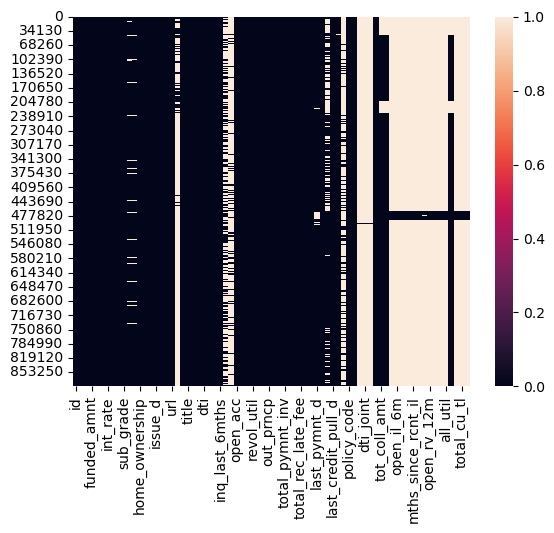

In [5]:
# visualizing null values
sns.heatmap(loan.isnull())

In [6]:
# putting columns with null values more than 30% into a list and listing them
nan_feature = [features for features in loan.columns if loan[features].isnull().sum()>1]
nan_todrop = []
for feature in nan_feature:
    if np.round(loan[feature].isnull().mean(), 2) >= 0.3:
        nan_todrop.append(feature)
        print(feature, np.round(loan[feature].isnull().mean(), 2), '% missing values')

desc 0.86 % missing values
mths_since_last_delinq 0.51 % missing values
mths_since_last_record 0.85 % missing values
mths_since_last_major_derog 0.75 % missing values
annual_inc_joint 1.0 % missing values
dti_joint 1.0 % missing values
verification_status_joint 1.0 % missing values
open_acc_6m 0.98 % missing values
open_il_6m 0.98 % missing values
open_il_12m 0.98 % missing values
open_il_24m 0.98 % missing values
mths_since_rcnt_il 0.98 % missing values
total_bal_il 0.98 % missing values
il_util 0.98 % missing values
open_rv_12m 0.98 % missing values
open_rv_24m 0.98 % missing values
max_bal_bc 0.98 % missing values
all_util 0.98 % missing values
inq_fi 0.98 % missing values
total_cu_tl 0.98 % missing values
inq_last_12m 0.98 % missing values


### What to Drop?
Any column that has more than 30%-50% of the data missing is considered a column of no use. You can try to find the reason of those missing values but randomly assigning values based on the measures of central tendency. This would only make the data biased. But you can try to group these values and try to figure out the missing values like in cell [7] We can try to find any pattern and replace missing values according to the pattern.

In [7]:
loan.groupby('loan_status')['mths_since_last_delinq'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,20186.0,34.279451,22.027187,0.0,15.0,31.0,50.0,152.0
Current,303413.0,33.770867,21.880154,0.0,15.0,30.0,49.0,188.0
Default,593.0,34.143339,22.108104,1.0,14.0,32.0,53.0,81.0
Does not meet the credit policy. Status:Charged Off,466.0,25.903433,24.804468,0.0,0.0,20.0,45.0,82.0
Does not meet the credit policy. Status:Fully Paid,1084.0,27.466790,24.149615,0.0,5.0,24.0,45.0,83.0
Fully Paid,91965.0,35.372218,21.748480,0.0,17.0,33.0,51.0,151.0
In Grace Period,3512.0,31.279897,21.664592,0.0,13.0,27.0,46.0,97.0
Issued,4444.0,34.064356,21.895037,0.0,15.0,31.0,49.0,116.0
Late (16-30 days),1326.0,30.986425,21.180122,0.0,14.0,26.0,45.0,82.0


In [8]:
loan.groupby('loan_status')['mths_since_last_delinq'].count().rsub(loan.groupby('loan_status').size(), axis=0)

loan_status
Charged Off                                             25062
Current                                                298366
Default                                                   626
Does not meet the credit policy. Status:Charged Off       295
Does not meet the credit policy. Status:Fully Paid        904
Fully Paid                                             115758
In Grace Period                                          2741
Issued                                                   4016
Late (16-30 days)                                        1031
Late (31-120 days)                                       5513
dtype: int64

There is no definite pattern which is noticeable, hence dropping this column is the only solution.

In [9]:
# dropping columns added to the list above
loan.drop(nan_todrop, axis =1, inplace= True)

In [10]:
# dropped 21 columns with missing values >=30%
loan.shape

(887379, 53)

In [11]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mt

In [12]:
# resultant dataframe
# loan.head()

In [13]:
# checking remaining null values
loan.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.057993
emp_length                    0.050514
home_ownership                0.000000
annual_inc                    0.000005
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000171
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000033
earliest_cr_line         

There are still some columns that have null values. We need to come up with a plan of action. But before that we can try to clean some columns that are numerical in nature but bound to object due to special characters. There are columns that have dates but are in object format. They need to be converted to datetime format (Hint: Can we introduce new columns from these dates?).

In [14]:
import regex as re
def just_num(word):
    '''
    only selecting numbers from the object
    '''
    num = re.findall(r'[0-9]+',word)  # regex code to find only numbers
    return " ".join(num)
loan['term'] = loan['term'].apply(lambda x: just_num(x))

We need to deal with another column that has similar characteristics like 'term' where there are special characters but we cannot use the above function. Since some values are not defined like '< 1 year' we need to assume their values. Here we will be considering < 1 year as 0 and 10+ years as 10.

In [15]:
loan['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [16]:
def emp_length(column):
    '''
    replacing special characters with spaces or strings to slice out just the number
    '''
    loan[column] = loan[column].str.replace('\+ years', '')
    loan[column] = loan[column].str.replace('< 1 year', str(0))
    loan[column] = loan[column].str.replace(' years', '')
    loan[column] = loan[column].str.replace(' year', '')
    loan[column] = pd.to_numeric(loan[column])
    loan[column].fillna(value = 0, inplace = True)

emp_length('emp_length')
loan['emp_length'].unique()

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_73639/124717788.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  loan[column] = loan[column].str.replace('\+ years', '')


array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [17]:
# to check resultant dtypes after editing
# loan.dtypes

In [18]:
# function converted term to string, converting it to string
loan['term'] = loan['term'].astype('int')

In [19]:
# converting dates that are in object format to datetime
loan['issue_d'] = pd.to_datetime(loan['issue_d'])
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'])
loan['next_pymnt_d'] = pd.to_datetime(loan['next_pymnt_d'])
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'])
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'])

### Adding new columns from the above dates
I had mentioned a hint before that we will be working with dates to find out the number of days from the last date used in this dataset. Here I am treating the max date as the date when an analyst would analyze or model the credit risk data. The number of days since the given is vey crucial in defining the credit risks. It used to be 'THE FACTOR' for defining a person's credit score and it is still one of the most important factors. So, new columns will be introduced based on these days and the dates can be discarded after the extractions.

In [20]:
# assuming the max date as the date of analysis
loan['next_pymnt_d'].max()

Timestamp('2016-03-01 00:00:00')

In [21]:
def months_calculator(date_column):
    default_date = pd.to_datetime('2016-03-15')
    # difference in months and adding it to a new column
    loan['months_after' + date_column] = round(((default_date - loan[date_column]) / 
                                                             np.timedelta64(1, 'M')).astype('float'))
    # make any resulting -ve values to be equal to the max date
    loan['months_after' + date_column] = loan['months_after' + date_column].apply(lambda 
                                                                        x: loan['months_after' + 
                                                                                date_column].max() if x < 0 else x)
    loan['months_after' + date_column] = loan['months_after' + date_column].apply(lambda x: loan['months_after' 
                                                                                       + date_column].max() 
                                                                        if x < 0 else x)
    loan['months_after' + date_column] = loan['months_after' + date_column].fillna(loan['months_after' + 
                                                                                        date_column].max())
    # drop the original date date_column
    loan.drop(columns = [date_column], inplace = True)
months_calculator('issue_d')
months_calculator('last_pymnt_d')
months_calculator('last_credit_pull_d')
months_calculator('earliest_cr_line')

In [22]:
loan.isnull().mean()

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.057993
emp_length                        0.000000
home_ownership                    0.000000
annual_inc                        0.000005
verification_status               0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
purpose                           0.000000
title                             0.000171
zip_code                          0.000000
addr_state                        0.000000
dti                               0.000000
delinq_2yrs

In [23]:
# loan.head()

In [24]:
loan['emp_title'].value_counts()

Teacher                                     13469
Manager                                     11240
Registered Nurse                             5525
Owner                                        5376
RN                                           5355
                                            ...  
Thomas J. Paul, Inc.                            1
Piggie Toes Preschool                           1
greystone park psychiatric hospital             1
Las Vegas Motropolitan Police Department        1
Manager Hotel Operations Oasis                  1
Name: emp_title, Length: 299271, dtype: int64

In [25]:
further_drop = ['emp_title', 'url', 'zip_code', 'next_pymnt_d', 'title', 'sub_grade']
loan.drop(further_drop, axis = 1, inplace= True)

In [26]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_afterissue_d,months_afterlast_pymnt_d,months_afterlast_credit_pull_d,months_afterearliest_cr_line
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,51.0,14.0,2.0,374.0
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,51.0,35.0,30.0,203.0
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,51.0,21.0,2.0,172.0
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,51.0,14.0,14.0,241.0
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Current,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,51.0,2.0,2.0,242.0


In [27]:
loan.isnull().mean()

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
emp_length                        0.000000
home_ownership                    0.000000
annual_inc                        0.000005
verification_status               0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
purpose                           0.000000
addr_state                        0.000000
dti                               0.000000
delinq_2yrs                       0.000033
inq_last_6mths                    0.000033
open_acc                          0.000033
pub_rec                           0.000033
revol_bal                         0.000000
revol_util 

In [28]:
loan.shape

(887379, 47)

In [29]:
# dropping rows that have missing cells in all of these columns
loan1 = loan.loc[(loan['collections_12_mths_ex_med'].notna()) & (loan['annual_inc'].notna()) & (loan['delinq_2yrs'].notna())
         & (loan['inq_last_6mths'].notna()) & (loan['revol_util'].notna()) & (loan['tot_coll_amt'].notna()) & 
         (loan['tot_cur_bal'].notna()) & (loan['total_rev_hi_lim'])]

In [30]:
loan1.shape

(816719, 47)

In [31]:
loan1.groupby('loan_status')[['revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 
                             'total_rev_hi_lim']].mean()

,revol_util,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_status,,,,,
Charged Off,59.815316,0.010368,133.817702,114432.943987,26376.297535
Current,55.310869,0.017487,232.508579,140253.286220,32957.645004
Default,58.084417,0.016667,133.981667,111352.140000,27469.422500
Fully Paid,54.039116,0.008679,219.938221,143745.120439,30482.968364
In Grace Period,60.114859,0.016815,217.083266,131051.686985,26708.175263
Issued,51.445979,0.024834,254.197966,145625.025071,35293.472800
Late (16-30 days),58.186426,0.021478,218.015893,132234.460481,27207.518900
Late (31-120 days),58.354013,0.018670,228.452539,119625.564823,27064.407608


In [32]:
loan1.isnull().mean()

id                                0.0
member_id                         0.0
loan_amnt                         0.0
funded_amnt                       0.0
funded_amnt_inv                   0.0
term                              0.0
int_rate                          0.0
installment                       0.0
grade                             0.0
emp_length                        0.0
home_ownership                    0.0
annual_inc                        0.0
verification_status               0.0
loan_status                       0.0
pymnt_plan                        0.0
purpose                           0.0
addr_state                        0.0
dti                               0.0
delinq_2yrs                       0.0
inq_last_6mths                    0.0
open_acc                          0.0
pub_rec                           0.0
revol_bal                         0.0
revol_util                        0.0
total_acc                         0.0
initial_list_status               0.0
out_prncp   

In [33]:
loan1['loan_status'].value_counts()

Current               597945
Fully Paid            153937
Charged Off            35206
Late (31-120 days)     11462
Issued                  8456
In Grace Period         6185
Late (16-30 days)       2328
Default                 1200
Name: loan_status, dtype: int64

In [34]:
# not considering In grace period or issued since they do not affect credit score 
loan2 = loan1.copy()
loan2 = loan2.loc[(loan2['loan_status'] != 'In Grace Period') & (loan2['loan_status'] != 'Issued')]
loan2.shape

(802078, 47)

In [35]:
# current = paying on time
# fully paid = all payments cleared
# both of them are a sign of good credit score hence we are treating them as 1
loan2.loc[(loan2['loan_status'] == 'Current')|(loan2['loan_status'] == 'Fully Paid'), 'status'] = 1

In [36]:
loan2.loc[loan2['status'] == 1]['loan_status'].value_counts()

Current       597945
Fully Paid    153937
Name: loan_status, dtype: int64

In [37]:
# fillining rest of the loan status as 0 
loan2['status'].fillna(0, inplace=True)

In [38]:
# adding categorical variables into a list
categorical = [x for x in loan2.columns if loan2[x].dtypes == 'O']

### Why are we visualizing the categorical and discrete variables?
Visualizing the data is underrated and underappreciated. Just a visual overview as to how the data is gives the user a huge amount of idea as to what needs to be done. We are visualizing the number of categorical/discrete variables to understand the distribution of each variable and weed out the redundant ones. 

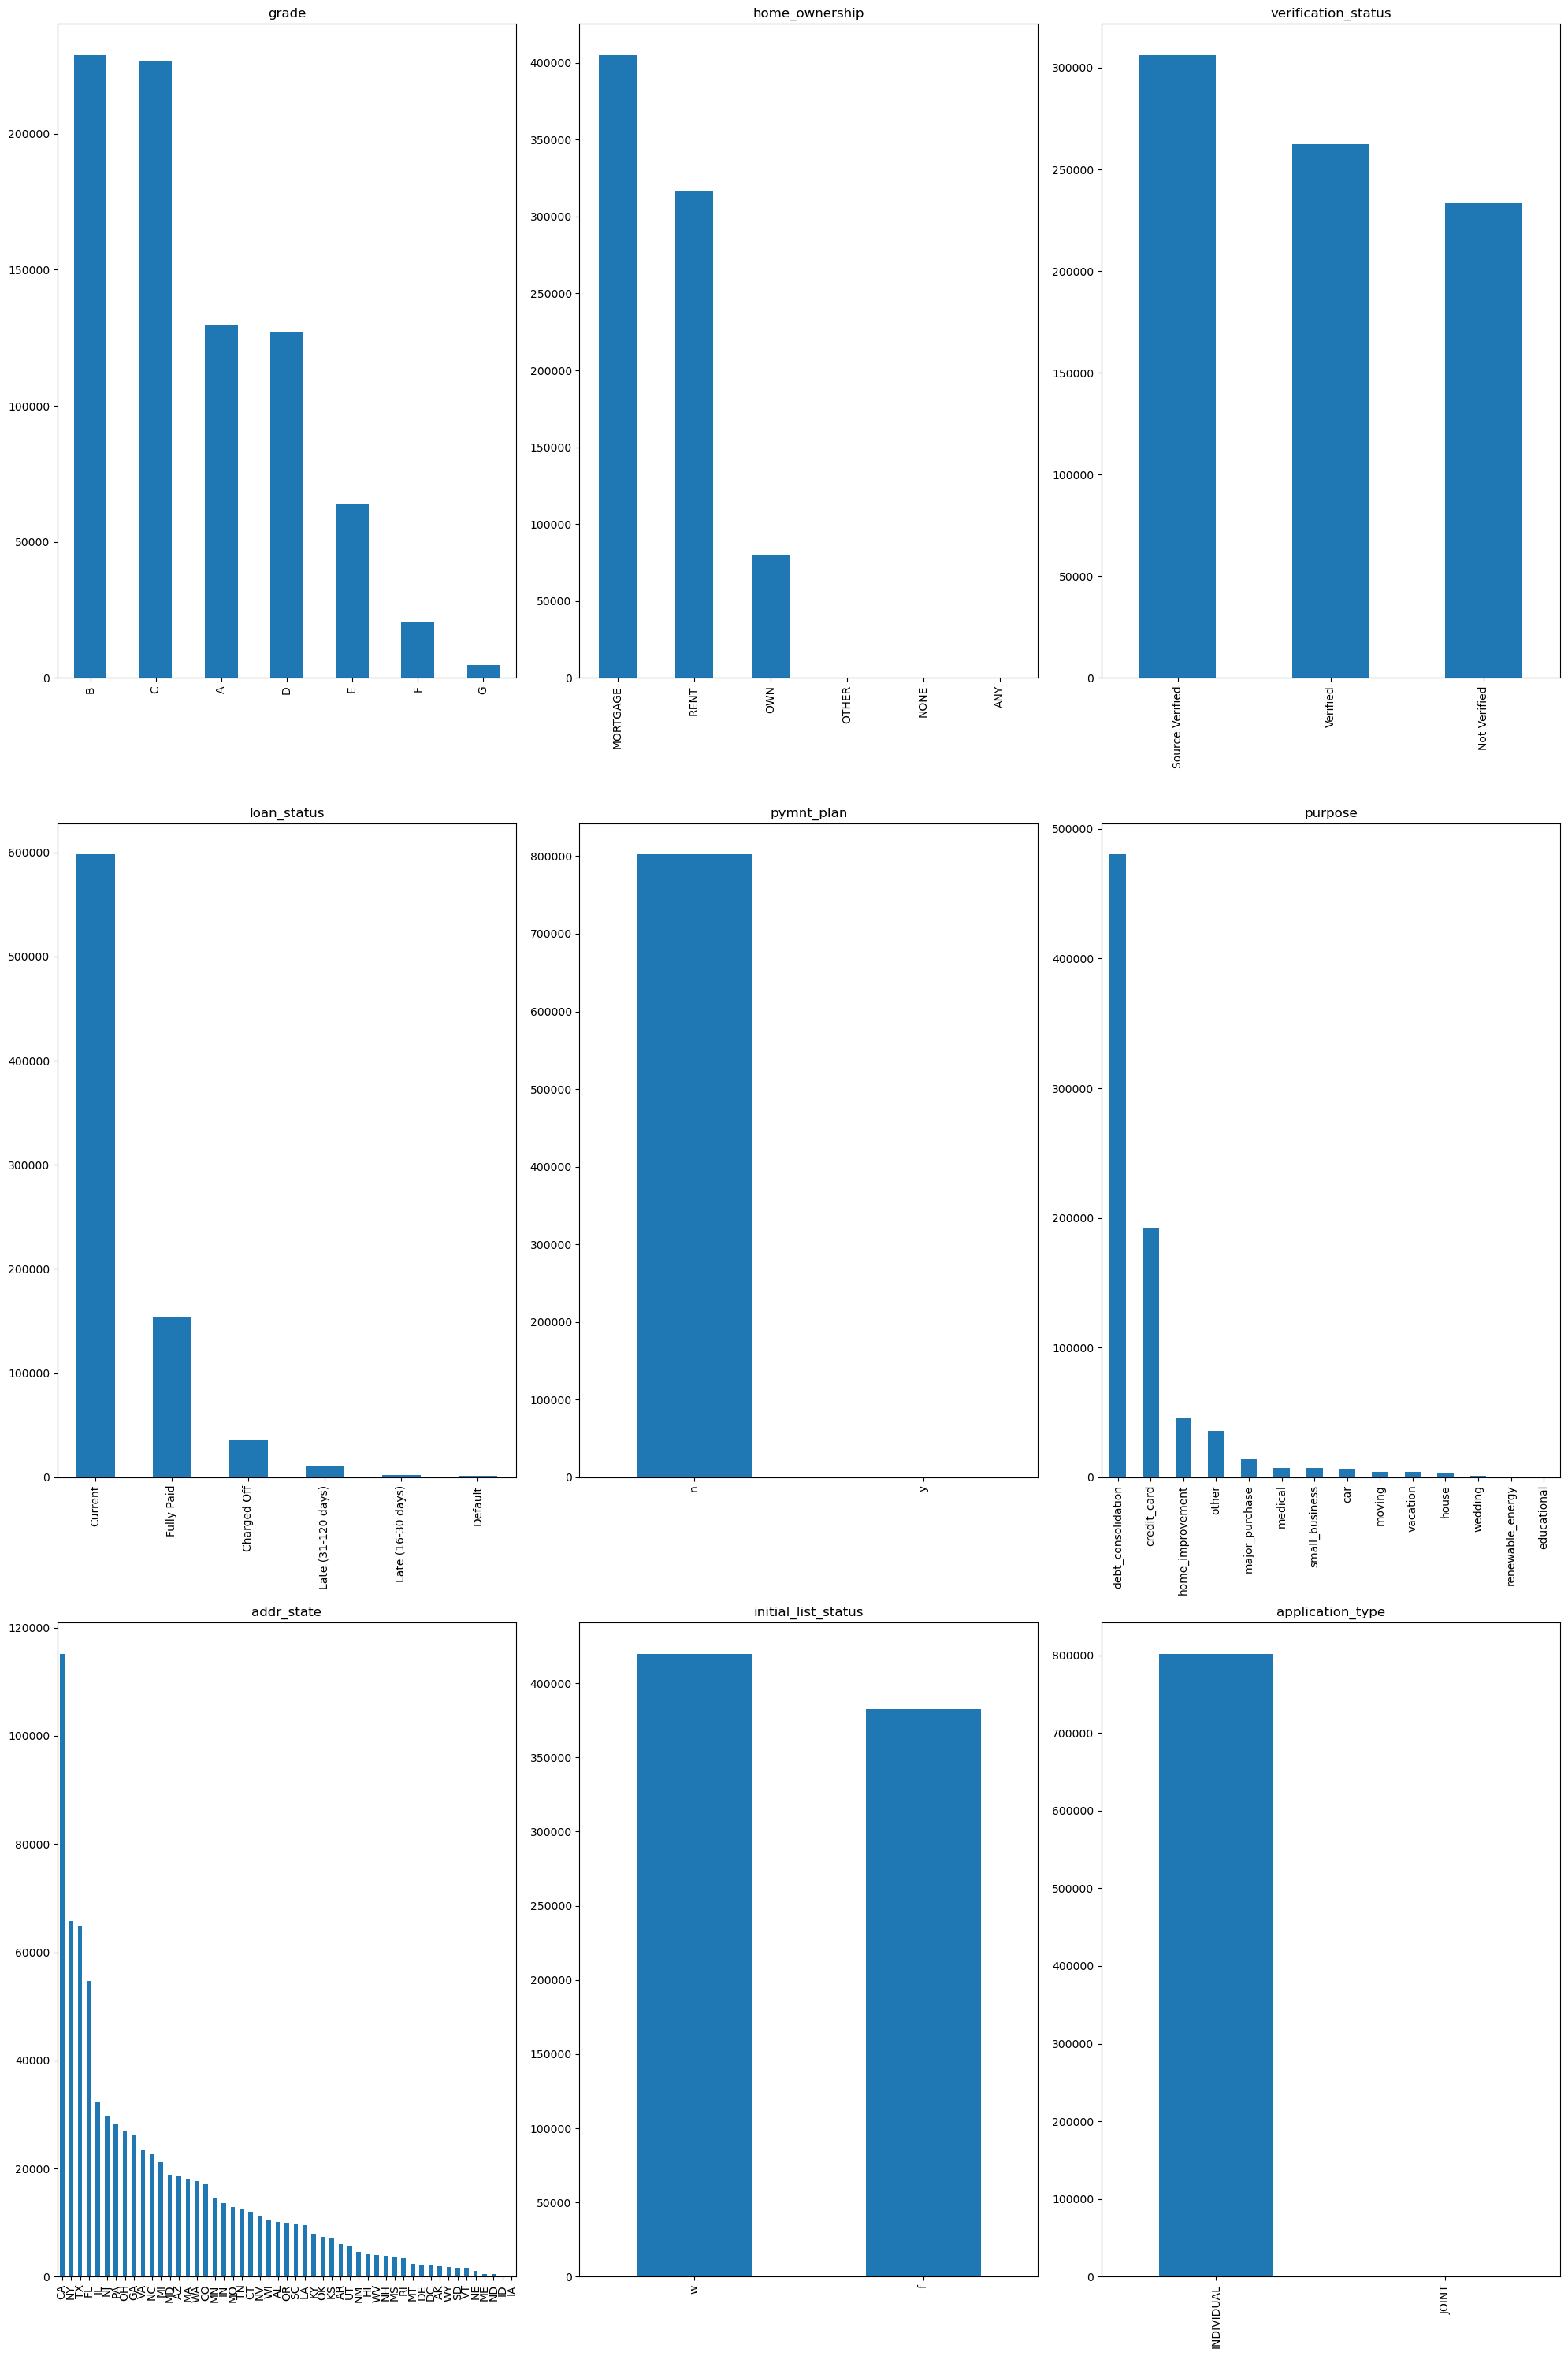

In [39]:
fig = plt.figure(1,figsize=(20,30))
for i, col in enumerate(categorical,1):
    fig.add_subplot(3,3,i,)
    loan2[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

We have got 9 categorical varibales each having more than 1 variable. Most of them have comparable elements but there are 2 attributes that need further investigation because keeping attributes with just 1 element becomes redundant.

In [40]:
loan2['application_type'].value_counts()

INDIVIDUAL    801634
JOINT            444
Name: application_type, dtype: int64

In [41]:
loan2.loc[loan2['application_type'] == 'JOINT']['status'].value_counts()

1.0    442
0.0      2
Name: status, dtype: int64

There are very less number of JOINT accounts and contain barely a 0.0005% of data. But if you look at status of JOINT accounts, it tells us something. Hence, I have decided to keep this variable.

In [42]:
loan2['pymnt_plan'].value_counts()

n    802072
y         6
Name: pymnt_plan, dtype: int64

In [43]:
# dropping this column since it contains variable equivalent to only 1 variable.
loan2.drop('pymnt_plan', axis = 1, inplace=True)

In [44]:
# putting discrete variables into 1 list
discrete = [x for x in loan2.columns if (loan2[x].dtypes != 'O') & (len(loan2[x].unique()) < 25)]

In [45]:
discrete

['term',
 'emp_length',
 'inq_last_6mths',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'status']

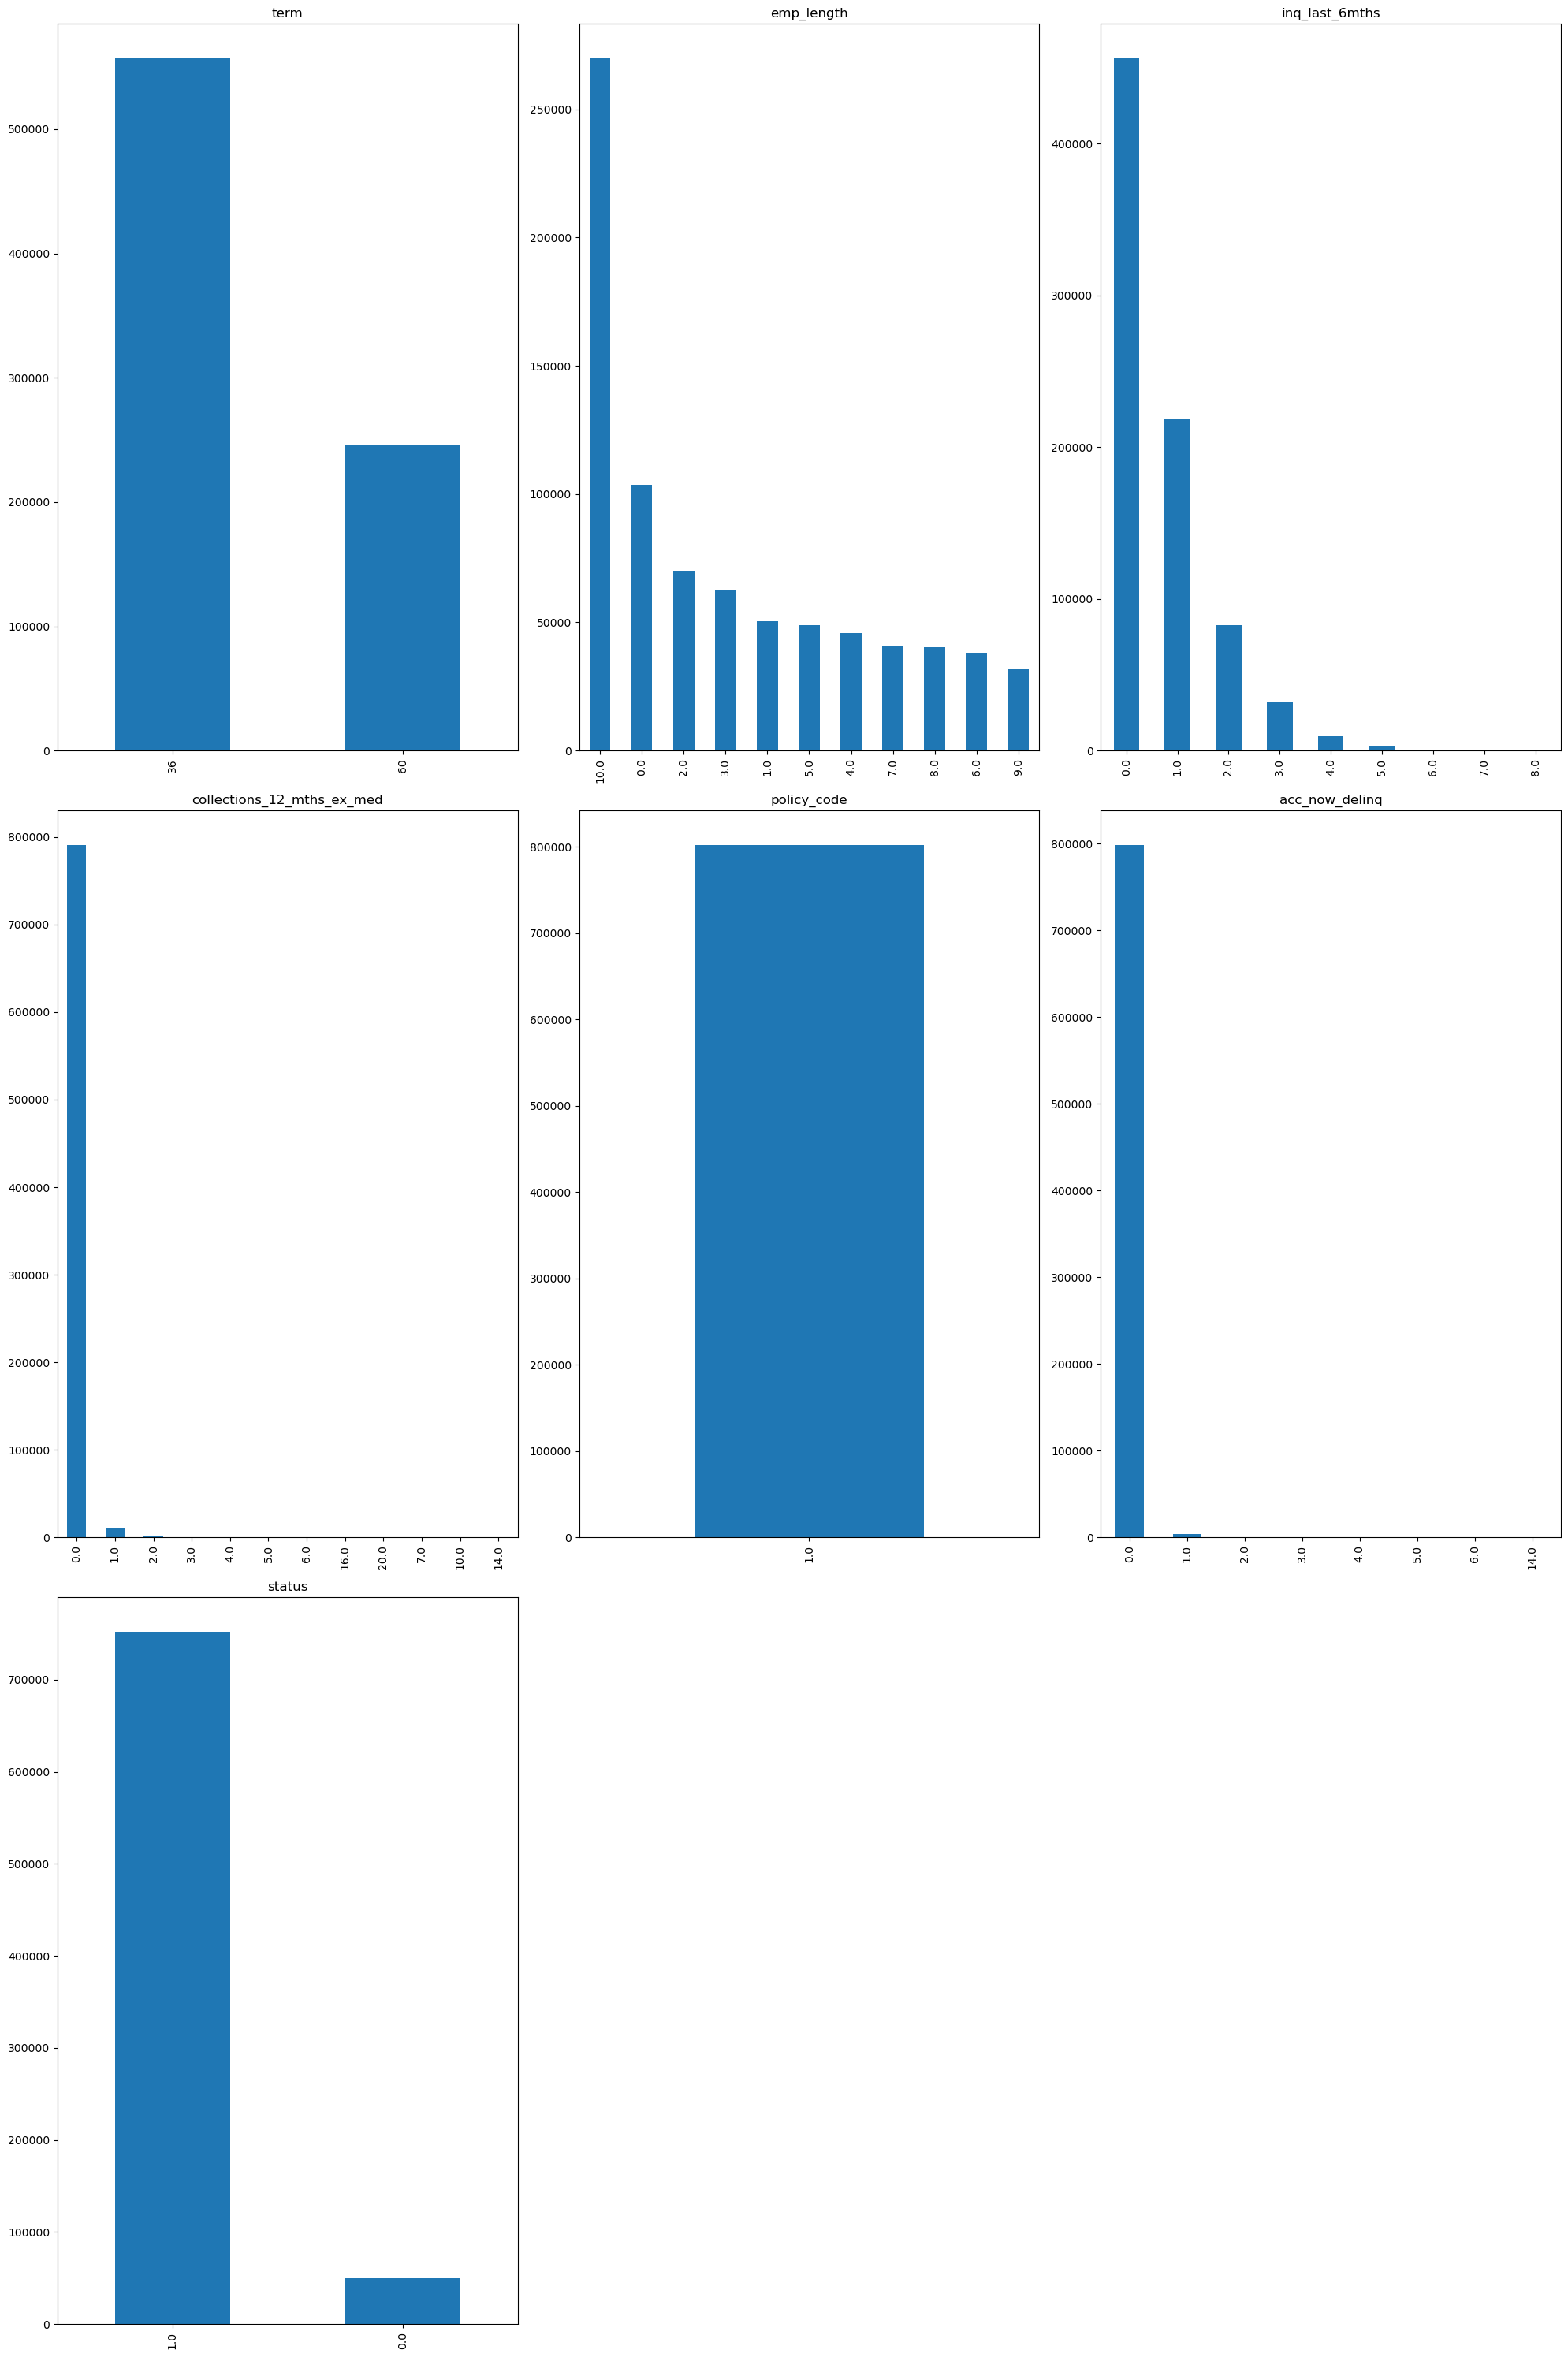

In [46]:
fig = plt.figure(1,figsize=(20,30))
for i, col in enumerate(discrete,1):
    fig.add_subplot(3,3,i,)
    loan2[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

In [47]:
# dropping column that has just 1 value
loan2.drop('policy_code', axis = 1, inplace= True)

In [48]:
numer = [x for x in loan2.columns if (x not in categorical) & (x not in discrete)]

In [49]:
numer

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'months_afterissue_d',
 'months_afterlast_pymnt_d',
 'months_afterlast_credit_pull_d',
 'months_afterearliest_cr_line']

In [50]:
def iv_woe(data, target, bins=10, show_woe=False):
    '''
    This function calculates Weight of Evidence and Information Value for each attribute whether it be categorcial 
    or discrete or numerical
    '''
    # empty dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    # column names to list
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for i in cols[~cols.isin([target])]:  # columns other than target
        # datatype boolean, integer, floating-type or complex floating-point and longth greater than 10
        if (data[i].dtype.kind in 'bifc') and (len(np.unique(data[i]))>10):
            # bin into 10 bins
            binned_x = pd.qcut(data[i], bins,  duplicates='drop')
            binned_data = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            # 
            binned_data = pd.DataFrame({'x': data[i], 'y': data[target]})
        d = binned_data.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=i)
        temp =pd.DataFrame({"Variable" : [i], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        # show_woe = True
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(loan2.iloc[:, 2:], target='status', bins=10)

In [51]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,loan_amnt,"(999.999, 5000.0]",86294,81312.0,1.081446e-01,4982.0,0.099251,0.085818,7.632401e-04
1,loan_amnt,"(5000.0, 7500.0]",77937,73330.0,9.752860e-02,4607.0,0.091780,0.060749,3.492075e-04
2,loan_amnt,"(7500.0, 10000.0]",128849,120713.0,1.605478e-01,8136.0,0.162085,-0.009527,1.464120e-05
3,loan_amnt,"(10000.0, 11200.0]",28194,26103.0,3.471688e-02,2091.0,0.041657,-0.182236,1.264687e-03
4,loan_amnt,"(11200.0, 13500.0]",80803,75725.0,1.007139e-01,5078.0,0.101163,-0.004453,2.001694e-06
5,loan_amnt,"(13500.0, 15600.0]",79984,75275.0,1.001154e-01,4709.0,0.093812,0.065028,4.098865e-04
6,loan_amnt,"(15600.0, 19075.0]",79566,74007.0,9.842901e-02,5559.0,0.110746,-0.117903,1.452191e-03
7,loan_amnt,"(19075.0, 22000.0]",81912,76859.0,1.022222e-01,5053.0,0.100665,0.015346,2.389074e-05
8,loan_amnt,"(22000.0, 28000.0]",89267,83965.0,1.116731e-01,5302.0,0.105626,0.055672,3.366569e-04
9,loan_amnt,"(28000.0, 35000.0]",69272,64593.0,8.590843e-02,4679.0,0.093215,-0.081622,5.963474e-04


In [52]:
iv.shape

(43, 2)

In [53]:
# bins = 10 and bins = 20 had the same number of columns
# to reduce calculative complications, sticking to bins = 10
iv.loc[(iv['IV']>0.02) & (iv['IV']<=0.5)].shape

(17, 2)

In [54]:
iv.loc[(iv['IV']>0.02) & (iv['IV']<=0.5)]

,Variable,IV
0,grade,0.376042
0,home_ownership,0.021261
0,annual_inc,0.049946
0,verification_status,0.042336
0,purpose,0.033116
0,addr_state,0.020111
0,dti,0.023064
0,inq_last_6mths,0.079468
0,revol_util,0.035340
0,initial_list_status,0.089013


In [55]:
# only selecting columns that come in the significant range of information value
imp_col = []
for i in iv.loc[(iv['IV']>0.02) & (iv['IV']<=0.5)]['Variable']:
    imp_col.append(i)

In [56]:
loan2.shape

(802078, 46)

In [57]:
loan3 = loan2.copy()
loan3 = loan3[imp_col]
loan3.shape

(802078, 17)

In [58]:
loan3.head()

,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,revol_util,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,tot_cur_bal,total_rev_hi_lim,months_afterlast_credit_pull_d
42535,B,OWN,55000.0,Verified,debt_consolidation,MI,22.87,0.0,61.2,w,21251.04,21251.04,17031.10,4219.94,114834.0,59900.0,3.0
42536,C,RENT,26000.0,Not Verified,debt_consolidation,CA,25.12,0.0,52.8,f,7994.83,7994.83,6039.04,1955.79,14123.0,15100.0,2.0
42537,A,MORTGAGE,105000.0,Not Verified,debt_consolidation,CT,14.05,1.0,21.6,w,8842.80,8842.80,7733.38,1109.42,267646.0,61100.0,2.0
42538,B,RENT,40000.0,Source Verified,debt_consolidation,NM,16.94,0.0,68.8,w,13359.77,13359.77,11999.99,1359.78,13605.0,8100.0,2.0
42539,A,MORTGAGE,63000.0,Not Verified,debt_consolidation,FL,16.51,0.0,74.2,w,11431.20,11431.20,9550.73,1880.47,272492.0,15400.0,2.0


In [59]:
loan3['status'] = loan2['status'].values

In [60]:
cate_discrete = [x for x in loan3.columns if (loan3[x].dtypes == 'O') | (len(loan3[x].unique()) < 25)]
cate_discrete

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'inq_last_6mths',
 'initial_list_status',
 'status']

In [61]:
# converting categorical variables into dummy variables
loan4 = pd.get_dummies(data= loan3, columns=cate_discrete)

In [62]:
loan4.shape

(802078, 104)

In [63]:
loan4.head()

,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,tot_cur_bal,total_rev_hi_lim,months_afterlast_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,inq_last_6mths_0.0,inq_last_6mths_1.0,inq_last_6mths_2.0,inq_last_6mths_3.0,inq_last_6mths_4.0,inq_last_6mths_5.0,inq_last_6mths_6.0,inq_last_6mths_7.0,inq_last_6mths_8.0,initial_list_status_f,initial_list_status_w,status_0.0,status_1.0
42535,55000.0,22.87,61.2,21251.04,21251.04,17031.10,4219.94,114834.0,59900.0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
42536,26000.0,25.12,52.8,7994.83,7994.83,6039.04,1955.79,14123.0,15100.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
42537,105000.0,14.05,21.6,8842.80,8842.80,7733.38,1109.42,267646.0,61100.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
42538,40000.0,16.94,68.8,13359.77,13359.77,11999.99,1359.78,13605.0,8100.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
42539,63000.0,16.51,74.2,11431.20,11431.20,9550.73,1880.47,272492.0,15400.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [64]:
loan3[['grade', 'status']]

,grade,status
42535,B,1.0
42536,C,1.0
42537,A,1.0
42538,B,1.0
42539,A,1.0
...,...,...
887374,B,1.0
887375,B,1.0
887376,D,1.0
887377,E,1.0


In [65]:
def woe_categorical(df, feature, good_bad_df, rotation = 'horizontal'):
    '''
    n_obs = number of observations of status with respect to categorical element. For e.g- status has 52 values with
    grade A
    prop_good = mean of the above observation with respect to categorical element. For e.g- grade G has 4690 observations.
    But good observation will only consist of 1s. So mean here will be number of 1s/sum of 4690. Tells you proportion
    of 1s in that grade
    prop_n_obs = mean of that categorical value with respect to all. For e.g- total Gs/ sum of Grade
    n_good = prop_good x n_obs
    n_bad = (1-prop_good)xn_obs
    prop_n_good = proportion of good. n_good/sum of n_good
    prop_n_bad = proportion of bad. n_bad/sum of n_bad
    WOE = ln(prop_n_good/prop_n_bad)
    diff_prop_good = cell 1 - cell 2
    diff_WOE = WOE1 - WOE2
    IV = (prop_n_good - prop_n_bad)xWOE
    '''
    df = pd.concat([df[feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    # counting number of elements in column 2 with respect to elements in column 1
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1) 
                    # calculating mean of elements in column 2 with respect to elements in column 1
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    
    x = np.array(df.iloc[:, 0].apply(str))
    y = df['WoE']
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, marker = 'd', linestyle = '-.', color = 'b')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df.columns[0]))
    plt.xticks(rotation = rotation)
    return df

## What To Look At?
There are things that we need to look at i.e. n_obs (number of observation) and the WOE (Weight of Evidence). Both of them are related to each other. If values have less number of observations, they can be merged together since their WOE will naturally go very high (even inf). If values have similar WOE we can merge them together but we need to check it's number of observation before merging them. We cannot merge 2 values with high WOE and huge difference between their obervations.

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,4690,0.799574,0.005847,3750.0,940.0,0.004987,0.018727,-1.323013,NaN,NaN,0.376042
1,F,20551,0.835531,0.025622,17171.0,3380.0,0.022837,0.067336,-1.081298,0.035958,0.241715,0.376042
2,E,64162,0.883841,0.079995,56709.0,7453.0,0.075423,0.148478,-0.677328,0.048310,0.403970,0.376042
3,D,127285,0.903579,0.158694,115012.0,12273.0,0.152965,0.244502,-0.469009,0.019738,0.208318,0.376042
4,C,226860,0.935833,0.282840,212303.0,14557.0,0.282362,0.290003,-0.026702,0.032254,0.442308,0.376042
5,B,228914,0.958928,0.285401,219512.0,9402.0,0.291950,0.187306,0.443840,0.023095,0.470542,0.376042
6,A,129616,0.983096,0.161600,127425.0,2191.0,0.169475,0.043649,1.356526,0.024168,0.912685,0.376042


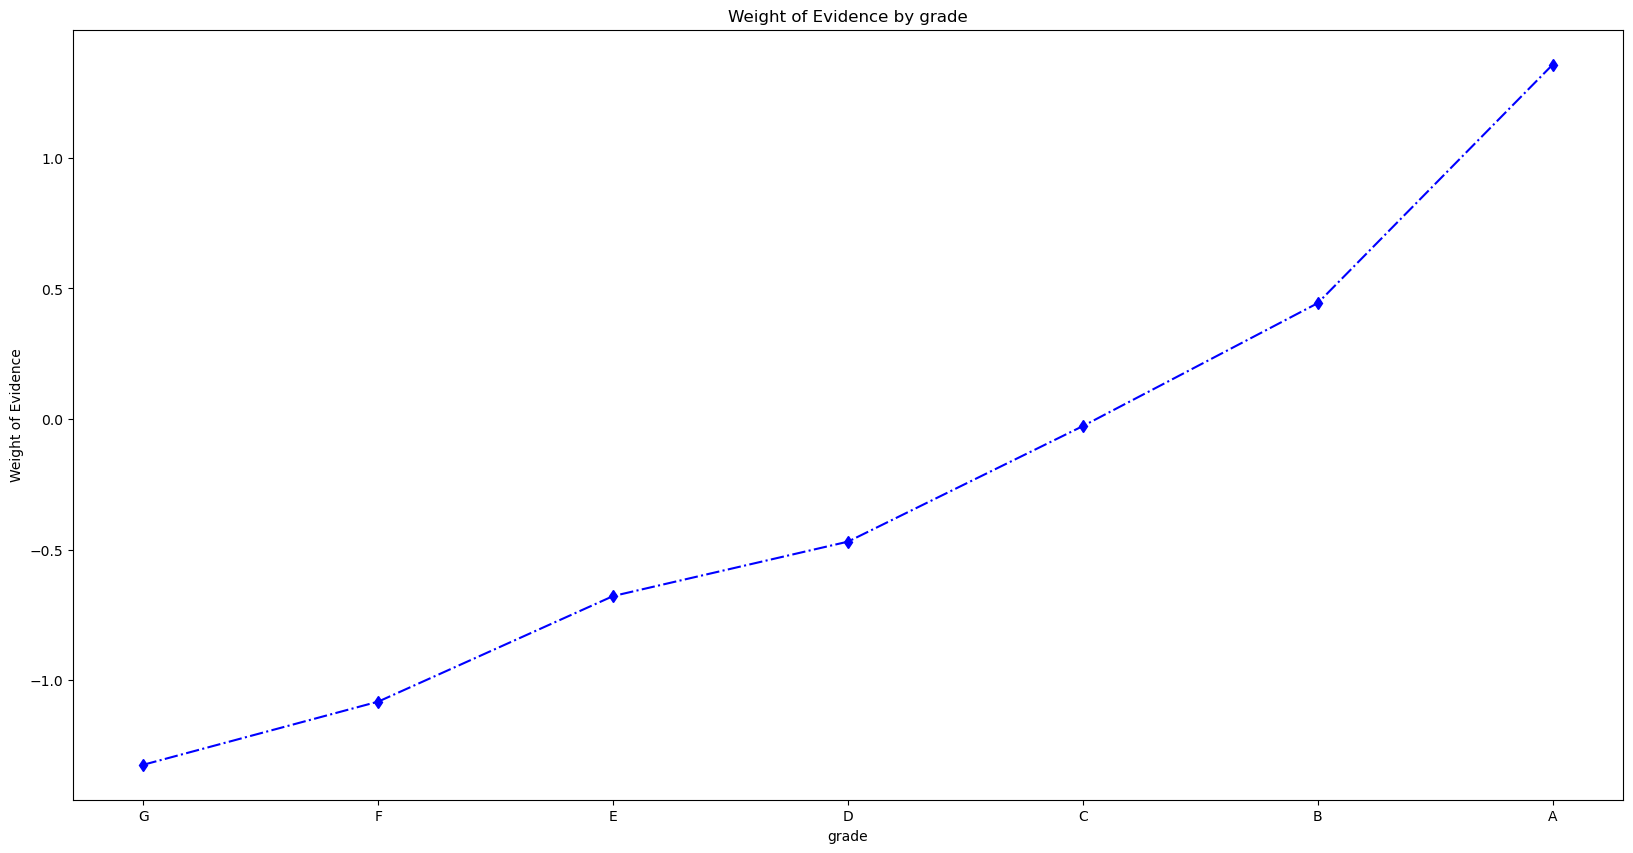

In [66]:
woe_categorical(loan3, 'grade', loan3['status'])

All grades have a linear relationship with weight of average. With 'A' having a very high WOE it raises suspiscion but if we look at it's 'n_obs', it seems to have a high value which removes our suspiscion. 'E' and 'D' have similar WOE but when we look at their 'n_obs', there is a huge difference, hence they cannot be merged. 
We are going to keep each of them in their original form, there is no need to merge them.

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.822222,0.000056,37.0,8.0,0.000049,0.000159,-1.175168,NaN,NaN,inf
1,NONE,42,0.833333,0.000052,35.0,7.0,0.000047,0.000139,-1.097206,0.011111,0.077962,inf
2,RENT,316575,0.926915,0.394694,293438.0,23137.0,0.390271,0.460933,-0.166411,0.093581,0.930795,inf
3,OWN,80322,0.940726,0.100142,75561.0,4761.0,0.100496,0.094848,0.057838,0.013811,0.224249,inf
4,MORTGAGE,405091,0.944993,0.505052,382808.0,22283.0,0.509133,0.443920,0.137065,0.004267,0.079227,inf
5,ANY,3,1.000000,0.000004,3.0,0.0,0.000004,0.000000,inf,0.055007,inf,inf


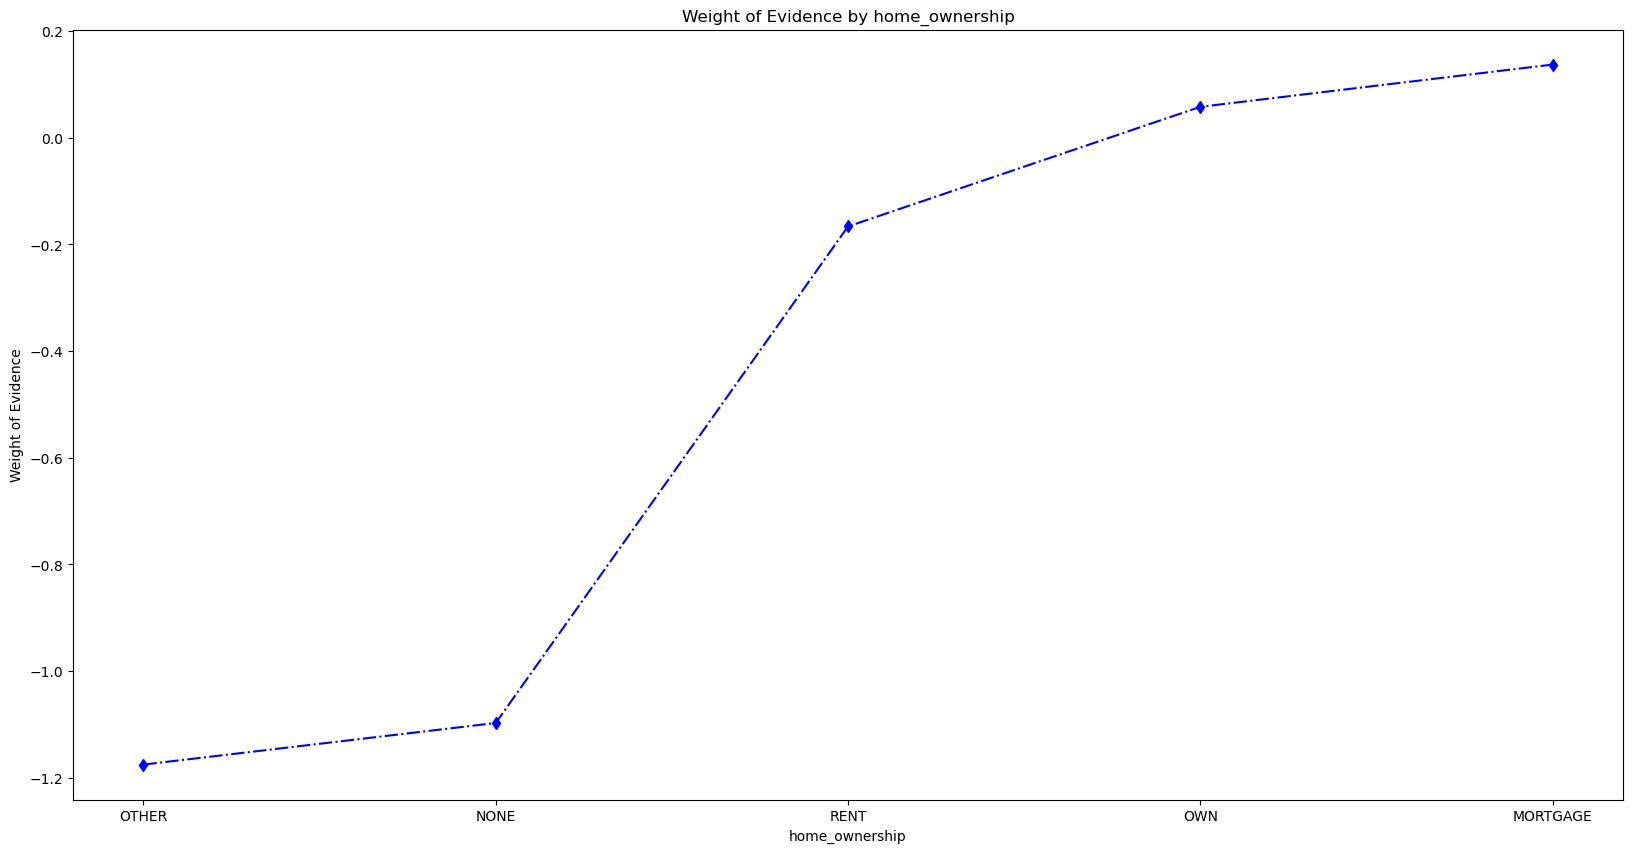

In [67]:
woe_categorical(loan3, 'home_ownership', loan3['status'])

There are 3 elements that can be grouped together i.e. 'OTHER', 'NONE' and 'ANY'. These can be easily merged since their number of observations are very low. Here 'ANY' has infinite WOE while others have finite WOE which might put questions in people's mind, whether to merge or not. 'ANY' has minute number of observation, which makes the WOE go very high. Since we do not know their reason, we will be merging them with 'RENT' since their proportion of bad events is higher (number of people with bad payment history). 

Final Groups:
1. OTHER, NONE, ANY, RENT
2. OWN
3. MORTGAGE

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,262242,0.919971,0.326953,241255.0,20987.0,0.320868,0.418101,-0.264693,NaN,NaN,0.042336
1,Source Verified,306232,0.943667,0.381798,288981.0,17251.0,0.384344,0.343673,0.111847,0.023696,0.37654,0.042336
2,Not Verified,233604,0.948811,0.291248,221646.0,11958.0,0.294788,0.238226,0.213037,0.005144,0.10119,0.042336


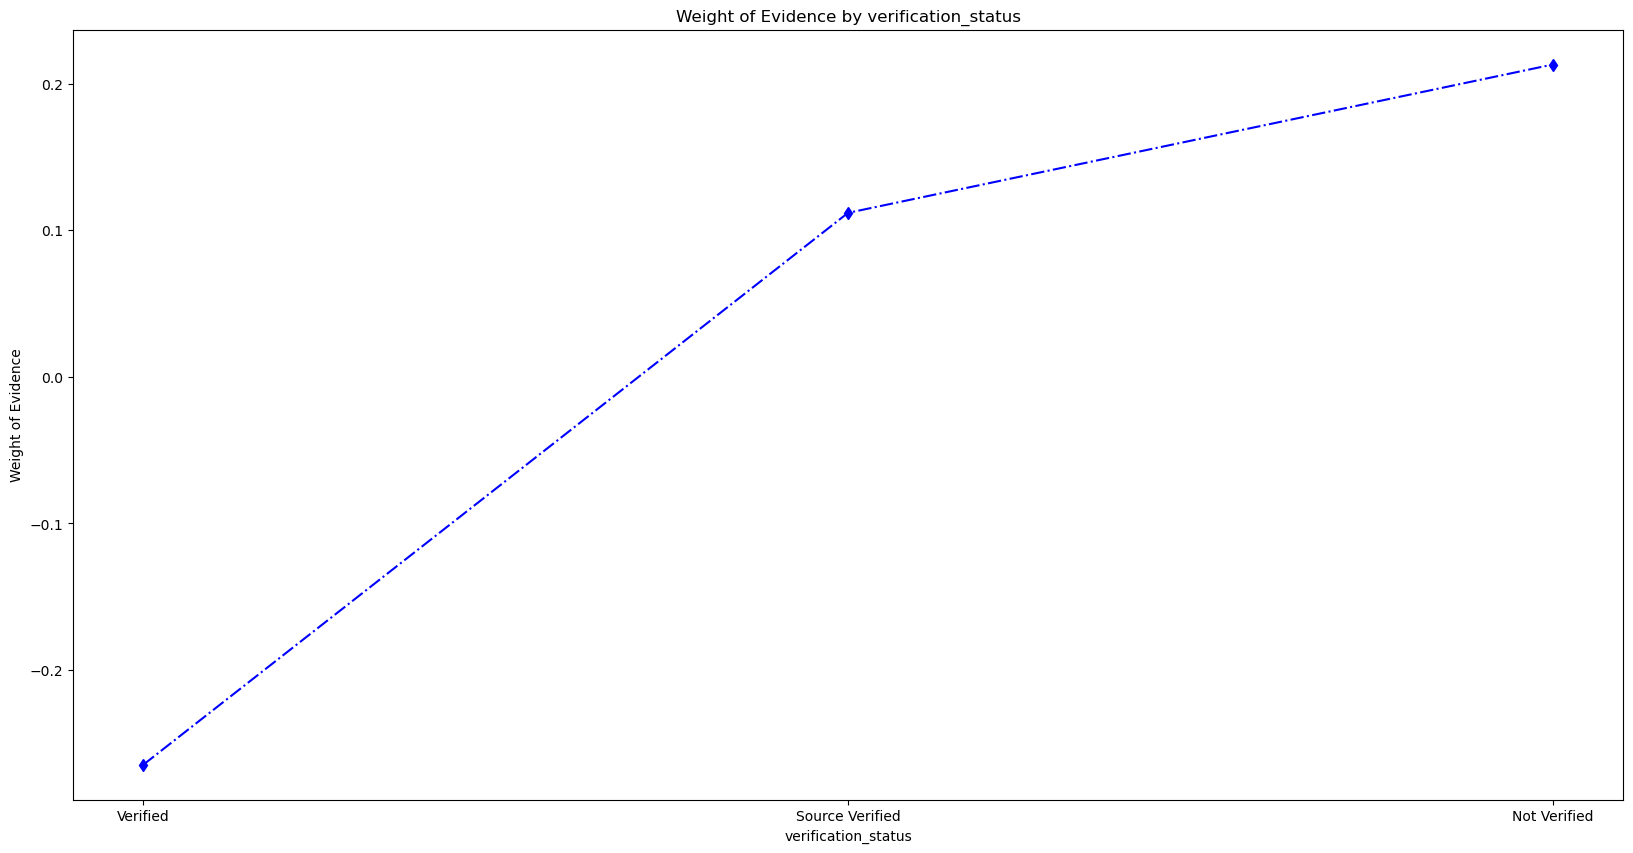

In [68]:
woe_categorical(loan3, 'verification_status', loan3['status'])

From the plot as well as the dataframe we can conclude than these attributes can be left in their original format. Their number of observations are large and their WOE are also very different.

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,873,0.860252,0.001088,751.0,122.0,0.000999,0.002430,-0.889259,NaN,NaN,inf
1,small_business,7260,0.872865,0.009051,6337.0,923.0,0.008428,0.018388,-0.780113,0.012613,0.109147,inf
2,moving,4452,0.906334,0.005551,4035.0,417.0,0.005367,0.008307,-0.436969,0.033469,0.343144,inf
3,house,2927,0.912880,0.003649,2672.0,255.0,0.003554,0.005080,-0.357325,0.006546,0.079644,inf
4,renewable_energy,418,0.918660,0.000521,384.0,34.0,0.000511,0.000677,-0.282362,0.005780,0.074963,inf
5,other,35873,0.923146,0.044725,33116.0,2757.0,0.044044,0.054925,-0.220771,0.004485,0.061591,inf
6,medical,7300,0.923288,0.009101,6740.0,560.0,0.008964,0.011156,-0.218766,0.000142,0.002005,inf
7,debt_consolidation,480256,0.933710,0.598765,448420.0,31836.0,0.596397,0.634234,-0.061511,0.010423,0.157254,inf
8,vacation,4037,0.933862,0.005033,3770.0,267.0,0.005014,0.005319,-0.059062,0.000151,0.002449,inf
9,major_purchase,13822,0.940385,0.017233,12998.0,824.0,0.017287,0.016416,0.051736,0.006523,0.110799,inf


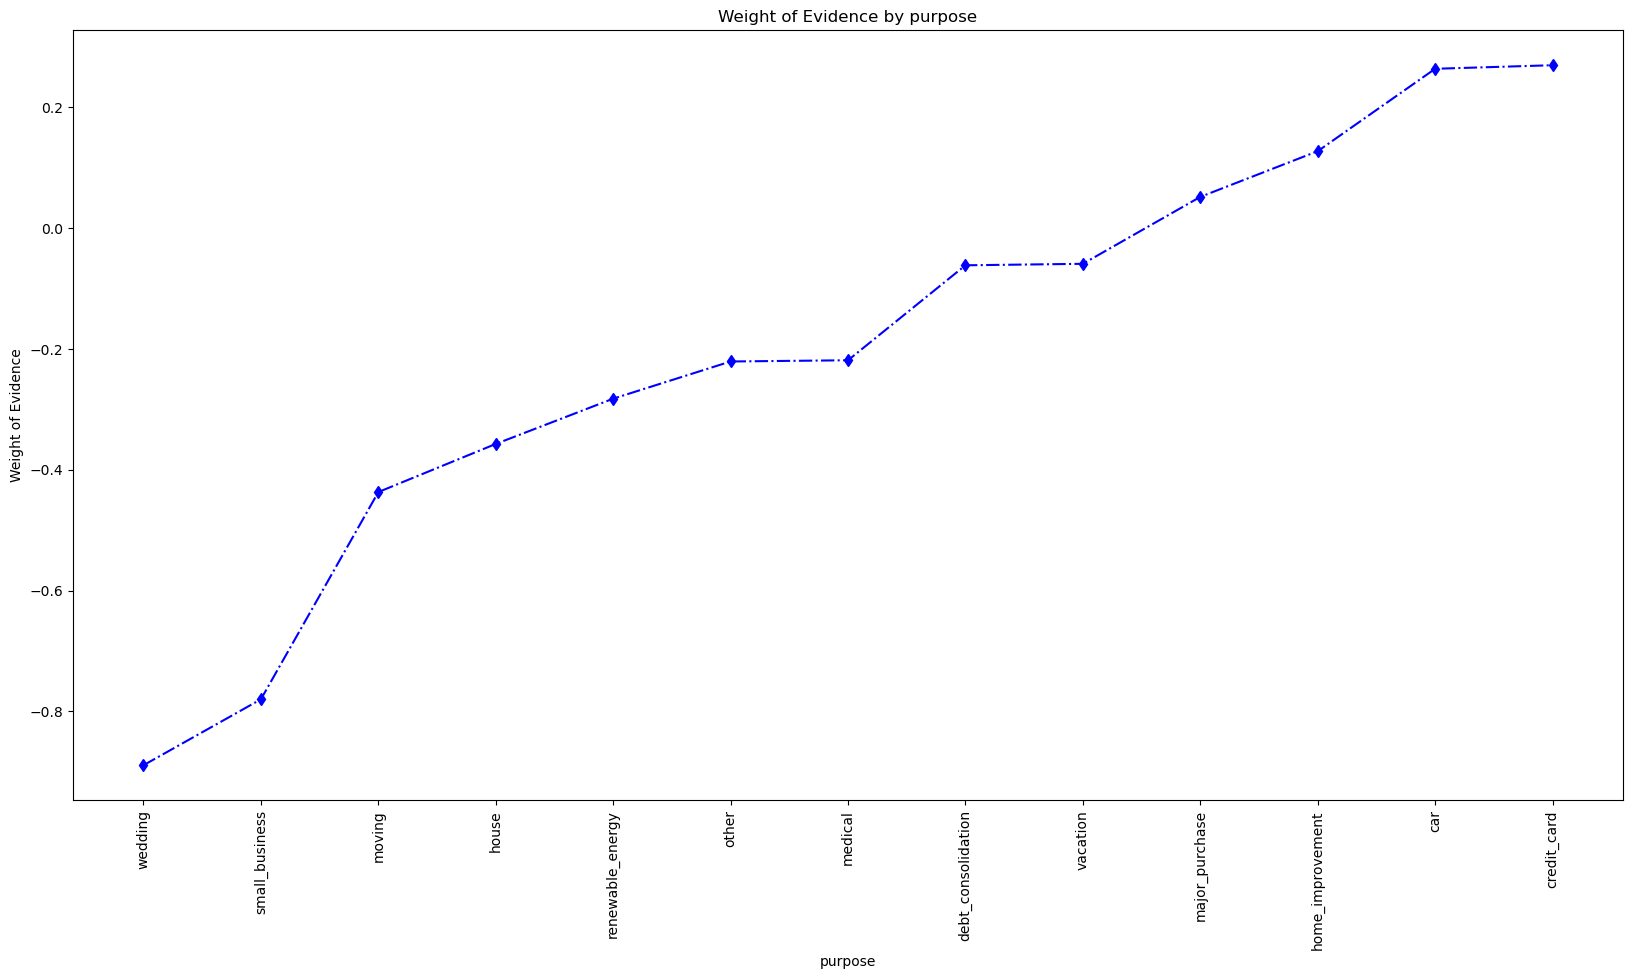

In [69]:
woe_categorical(loan3, 'purpose', loan3['status'], rotation='vertical')

After looking at the number of observations and the WOE, these will be the groups:
1. wedding
2. small_business
3. moving, house, renewable energy, educational (n_obs closer to renewable energy)
4. other, medical
5. debt_consolidation
6. vacation, major_purchase, home_improvement
7. car, credit_card

The groups have been made based on their similarity with 'n_obs' and their 'WOE'. Major doubt comes when we see that debt_consolidation and vacation have not been grouped together. Debt consolidation in banking is treated as a red flag and cannot be merged with any attributes.

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,2,0.500000,0.000002,1.0,1.0,0.000001,0.000020,-2.706644,NaN,NaN,inf
1,HI,4156,0.920356,0.005182,3825.0,331.0,0.005087,0.006594,-0.259449,0.420356,2.447195,inf
2,NV,11343,0.920480,0.014142,10441.0,902.0,0.013886,0.017970,-0.257763,0.000123,0.001686,inf
3,AL,10152,0.926418,0.012657,9405.0,747.0,0.012509,0.014882,-0.173712,0.005939,0.084050,inf
4,NY,65809,0.929706,0.082048,61183.0,4626.0,0.081373,0.092159,-0.124467,0.003287,0.049245,inf
5,VA,23423,0.930069,0.029203,21785.0,1638.0,0.028974,0.032632,-0.118898,0.000363,0.005569,inf
6,OK,7393,0.930881,0.009217,6882.0,511.0,0.009153,0.010180,-0.106349,0.000812,0.012549,inf
7,LA,9567,0.931117,0.011928,8908.0,659.0,0.011848,0.013129,-0.102663,0.000237,0.003686,inf
8,FL,54615,0.931136,0.068092,50854.0,3761.0,0.067636,0.074926,-0.102370,0.000019,0.000292,inf
9,UT,5697,0.931894,0.007103,5309.0,388.0,0.007061,0.007730,-0.090491,0.000758,0.011880,inf


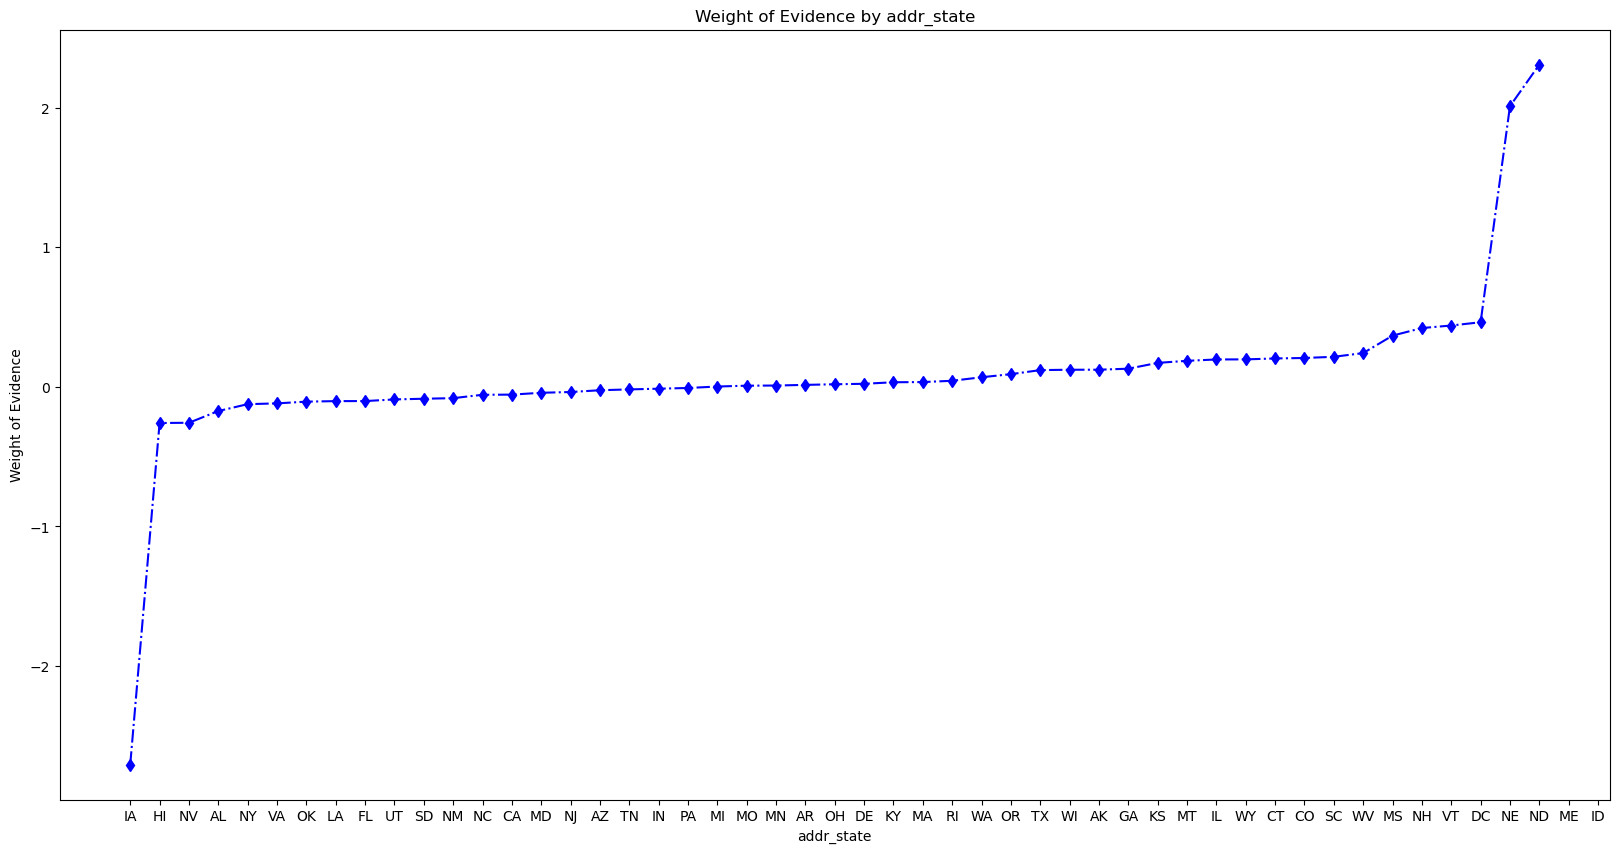

In [70]:
woe_categorical(loan3, 'addr_state', loan3['status'])

Here it is very difficult to find out which attributes can be grouped or merged. The strategy for grouping these elements will include looking at the n_obs and WOE like before with a twist. Since the WOE of elements are very similar we will keep grouping elements looking at their WOE first. When we see that the n_obs of the succeding element decreases, the group ends there and a new group starts. There are cases where there is only a single element in a group. The n_obs difference and the WOE difference must have been too large or the previous strategy might be isolating some elements. Some elements have their n_obs very low i.e. >2000, they have been grouped together to have a comparable n_obs with rest of the groups.

On the basis of the strategy described, here are the final groups:
1. IA, HI, ID, ME, WY, DC, NE, ND, ME
2. NV, AL
3. NY
4. VA, OK, LA, FL
5. UT, SD, NM, NC
6. CA
7. MD, NJ, AZ, TN, IN, PA, MI, MO, MN
8. AR, OH
9. DE, KY, MA
10. RI
11. WA, OR
12. TX, WI
13. AK, GA
14. KS, MT, IL

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,860,0.826744,0.001072,711.0,149.0,0.000946,0.002968,-1.143918,NaN,NaN,inf
1,5.0,3258,0.885206,0.004062,2884.0,374.0,0.003836,0.007451,-0.663966,0.058461,0.479952,inf
2,3.0,31740,0.890548,0.039572,28266.0,3474.0,0.037594,0.069209,-0.610291,0.005343,0.053675,inf
3,4.0,9395,0.891644,0.011713,8377.0,1018.0,0.011141,0.020281,-0.598994,0.001096,0.011297,inf
4,2.0,82613,0.910426,0.102999,75213.0,7400.0,0.100033,0.147422,-0.387800,0.018781,0.211194,inf
5,1.0,218201,0.931407,0.272045,203234.0,14967.0,0.270300,0.298171,-0.098134,0.020982,0.289666,inf
6,0.0,456007,0.949970,0.568532,433193.0,22814.0,0.576145,0.454498,0.237165,0.018563,0.335299,inf
7,7.0,3,1.000000,0.000004,3.0,0.0,0.000004,0.000000,inf,0.050030,inf,inf
8,8.0,1,1.000000,0.000001,1.0,0.0,0.000001,0.000000,inf,0.000000,NaN,inf


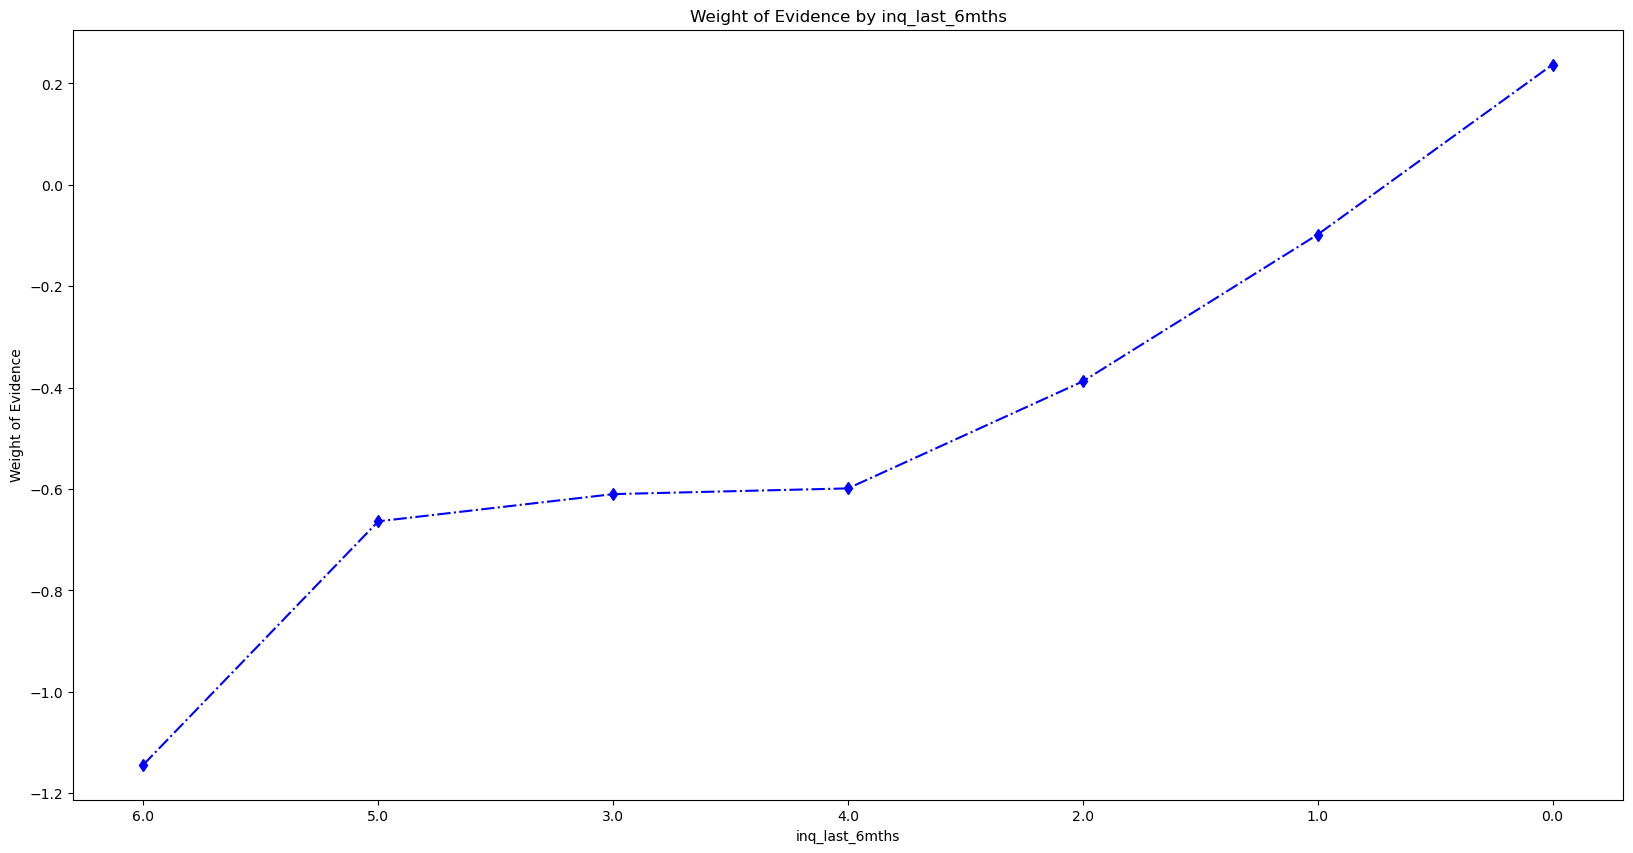

In [71]:
woe_categorical(loan3, 'inq_last_6mths', loan3['status'])

From the previous strategy, 7.0, 8.0, 6.0 will be grouped together due to their low n_obs. Here 5.0 and 3.0 cannot be grouped since there is a huge reduction in the n_obs for 3.0 which indicates that n_obs is influencing the WOE. But we can definitely combine 3.0 and 4.0 since 4.0 has a greater n_obs and similar WOE.

Final Groups:
1. 6.0, 7.0, 8.0
2. 5.0
3. 3.0, 4.0
4. 2.0
5. 1.0
6. 0.0

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,382401,0.919195,0.476763,351501.0,30900.0,0.467495,0.615587,-0.275188,NaN,NaN,0.089013
1,w,419677,0.954022,0.523237,400381.0,19296.0,0.532505,0.384413,0.325875,0.034827,0.601062,0.089013


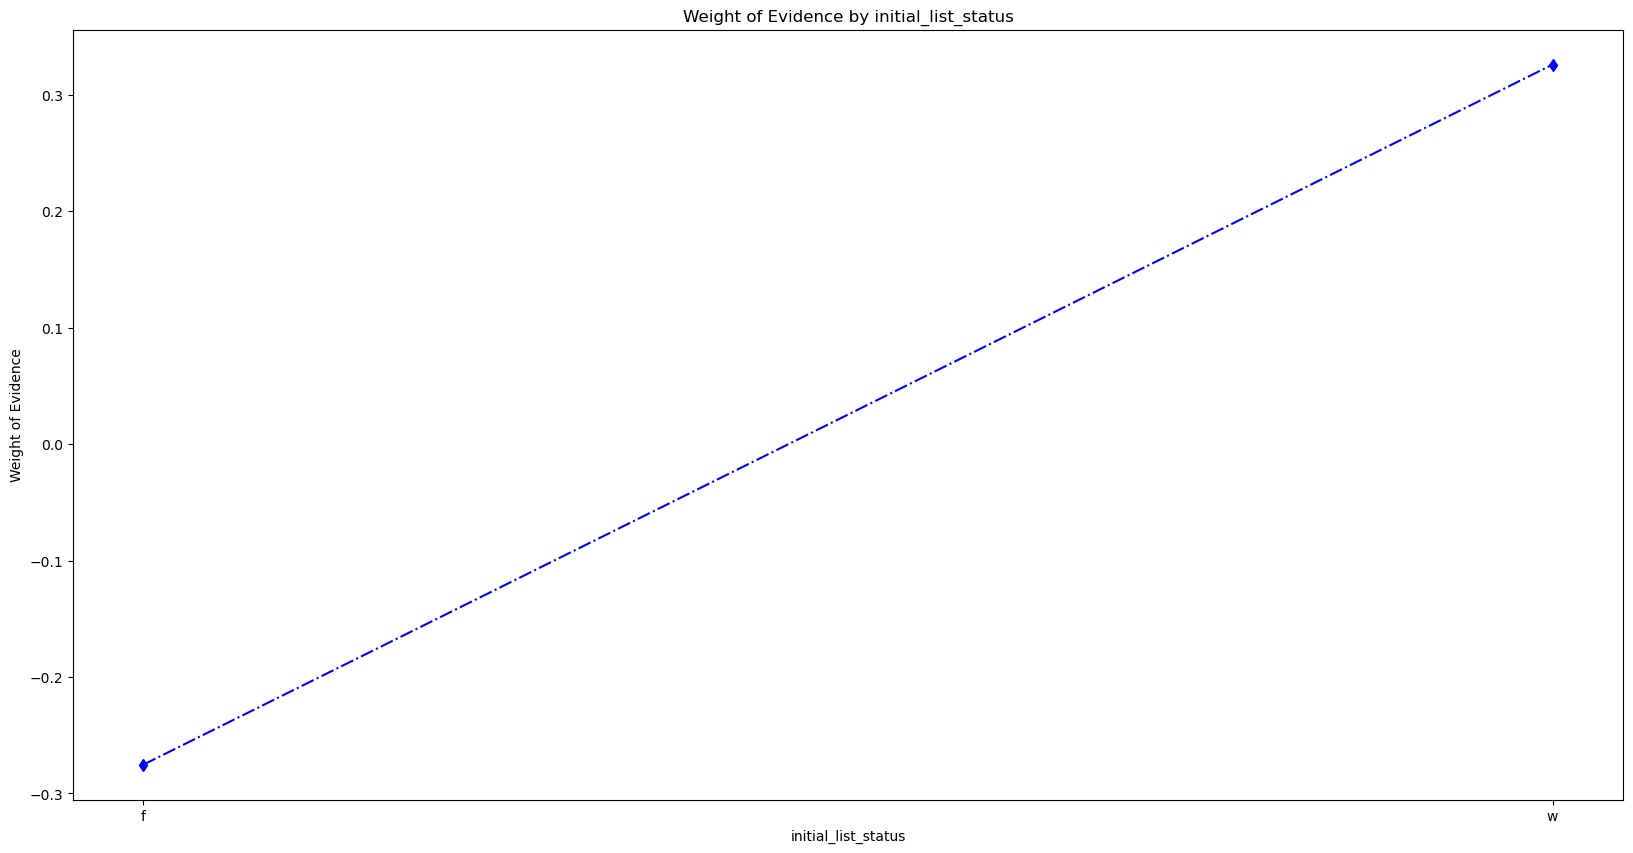

In [72]:
woe_categorical(loan3, 'initial_list_status', loan3['status'])

There is no need for grouping here. There is a significant difference between 'f' and 'n' WOE.

In [73]:
loan5 = loan4.iloc[:, :17]
loan5.head()

,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,tot_cur_bal,total_rev_hi_lim,months_afterlast_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
42535,55000.0,22.87,61.2,21251.04,21251.04,17031.10,4219.94,114834.0,59900.0,3.0,0,1,0,0,0,0,0
42536,26000.0,25.12,52.8,7994.83,7994.83,6039.04,1955.79,14123.0,15100.0,2.0,0,0,1,0,0,0,0
42537,105000.0,14.05,21.6,8842.80,8842.80,7733.38,1109.42,267646.0,61100.0,2.0,1,0,0,0,0,0,0
42538,40000.0,16.94,68.8,13359.77,13359.77,11999.99,1359.78,13605.0,8100.0,2.0,0,1,0,0,0,0,0
42539,63000.0,16.51,74.2,11431.20,11431.20,9550.73,1880.47,272492.0,15400.0,2.0,1,0,0,0,0,0,0


In [74]:
loan4.head()

,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,tot_cur_bal,total_rev_hi_lim,months_afterlast_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,inq_last_6mths_0.0,inq_last_6mths_1.0,inq_last_6mths_2.0,inq_last_6mths_3.0,inq_last_6mths_4.0,inq_last_6mths_5.0,inq_last_6mths_6.0,inq_last_6mths_7.0,inq_last_6mths_8.0,initial_list_status_f,initial_list_status_w,status_0.0,status_1.0
42535,55000.0,22.87,61.2,21251.04,21251.04,17031.10,4219.94,114834.0,59900.0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
42536,26000.0,25.12,52.8,7994.83,7994.83,6039.04,1955.79,14123.0,15100.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
42537,105000.0,14.05,21.6,8842.80,8842.80,7733.38,1109.42,267646.0,61100.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
42538,40000.0,16.94,68.8,13359.77,13359.77,11999.99,1359.78,13605.0,8100.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
42539,63000.0,16.51,74.2,11431.20,11431.20,9550.73,1880.47,272492.0,15400.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [75]:
loan3.columns

Index(['grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'revol_util', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'tot_cur_bal', 'total_rev_hi_lim', 'months_afterlast_credit_pull_d', 'status'], dtype='object')

### Merging Columns with Less Significance

In [76]:

# home_ownership 

loan5['home_ownership_OTHER_NONE_RENT_ANY'] = sum([loan4['home_ownership_OTHER'], loan4['home_ownership_NONE'],
                                                 loan4['home_ownership_RENT'], loan4['home_ownership_ANY']])
loan5['home_ownership_MORTGAGE'] = loan4['home_ownership_MORTGAGE'].values
loan5['home_ownership_OWN'] = loan4['home_ownership_OWN'].values

# verification status
loan5['verification_status_not_verified'] = loan4['verification_status_Not Verified']
loan5['verification_status_source_verified'] = loan4['verification_status_Source Verified']
loan5['verification_status_verified'] = loan4['verification_status_Verified']

# purpose of loan
# wedding
# small_business
# moving, house, renewable energy, educational (n_obs closer to renewable energy)
# other, medical
# debt_consolidation
# vacation, major_purchase, home_improvement
# car, credit_card
loan5['purpose_small_business'] = loan4['purpose_small_business'].values

loan5['purpose_wedding'] = loan4['purpose_wedding'].values
loan5 ['purpose_moving_house_educational_renewble_energy'] = sum([loan4['purpose_moving'], loan4['purpose_house'], 
                                                                  loan4['purpose_educational'],
                                                                  loan4['purpose_renewable_energy']])
loan5 ['purpose_other_medical'] = sum([loan4['purpose_other'], loan4['purpose_medical']])
loan5['purpose_debt_consolidation'] = loan4['purpose_debt_consolidation'].values
loan5 ['purpose_vacation_major_purchase_home_improvement'] = sum([loan4['purpose_vacation'], 
                                                                  loan4['purpose_major_purchase'], 
                                                                  loan4['purpose_home_improvement']])
loan5 ['purpose_car_credit_card'] = sum([loan4['purpose_car'], loan4['purpose_credit_card']])

# addr state
# IA, HI, ID, ME, WY, DC, NE, ND, ME
# NV, AL
# NY
# VA, OK, LA, FL
# UT, SD, NM, NC
# CA
# MD, NJ, AZ, TN, IN, PA, MI, MO, MN
# AR, OH
# DE, KY, MA
# RI
# WA, OR
# TX, WI
# AK, GA
# KS, MT, IL
loan5['addr_state_ia_hi_id_me_wy_dc_ne_nd_me'] = sum([loan4['addr_state_IA'], loan4['addr_state_HI'],
                                                     loan4['addr_state_ID'], loan4['addr_state_ME'],
                                                     loan4['addr_state_WY'], loan4['addr_state_DC'],
                                                     loan4['addr_state_NE'], loan4['addr_state_ND'],
                                                     loan4['addr_state_ME']])
loan5['addr_state_nv_al'] = sum([loan4['addr_state_NV'], loan4['addr_state_AL']])
loan5['addr_state_NY'] = loan4['addr_state_NY'].values
loan5['addr_state_va_ok_la_fl'] = sum([loan4['addr_state_VA'], loan4['addr_state_OK'], loan4['addr_state_LA'],
                                       loan4['addr_state_FL']])
loan5['addr_state_ut_sd_nm_nc'] = sum([loan4['addr_state_UT'], loan4['addr_state_SD'], loan4['addr_state_NM'],
                                       loan4['addr_state_NC']])
loan5['addr_state_CA'] = loan4['addr_state_CA'].values
loan5['addr_state_md_nj_az_tn_in_pa_mi_mo_mn'] = sum([loan4['addr_state_MD'], loan4['addr_state_NJ'],
                                                      loan4['addr_state_AZ'], loan4['addr_state_TN'],
                                                      loan4['addr_state_IN'], loan4['addr_state_PA'],
                                                      loan4['addr_state_MI'], loan4['addr_state_MO'],
                                                      loan4['addr_state_MN']])
loan5['addr_state_ar,oh'] = sum([loan4['addr_state_AR'], loan4['addr_state_OH']])
loan5['addr_state_de_ky_ma'] = sum([loan4['addr_state_DE'], loan4['addr_state_KY'], loan4['addr_state_MA']])
loan5['addr_state_ri'] = loan4['addr_state_RI'].values

loan5['addr_state_wa_or'] = sum([loan4['addr_state_WA'], loan4['addr_state_OR']])
loan5['addr_state_tx_wi'] = sum([loan4['addr_state_TX'], loan4['addr_state_WI']])
loan5['addr_state_ak_ga'] = sum([loan4['addr_state_AK'], loan4['addr_state_GA']])
loan5['addr_state_ks_mt_il'] =sum([loan4['addr_state_KS'], loan4['addr_state_MT'], loan4['addr_state_IL']])

# initial_list_status
loan5['initial_list_status_f'] = loan4['initial_list_status_f'].values
loan5['initial_list_status_w'] = loan4['initial_list_status_w'].values

# inquiry in last 6months
# 6.0, 7.0, 8.0
# 5.0
# 3.0, 4.0
# 2.0
# 1.0
# 0.0
loan5['inquiry_lst_6mths_678'] = sum([loan4['inq_last_6mths_6.0'], loan4['inq_last_6mths_7.0'], 
                                      loan4['inq_last_6mths_8.0']])
loan5['inquiry_lst_6mths_5'] = loan4['inq_last_6mths_5.0']
loan5['inquiry_lst_6mths_34'] = sum([loan4['inq_last_6mths_3.0'], loan4['inq_last_6mths_4.0']])
loan5['inquiry_lst_6mths_2'] = loan4['inq_last_6mths_2.0']
loan5['inquiry_lst_6mths_1'] = loan4['inq_last_6mths_1.0']
loan5['inquiry_lst_6mths_0'] = loan4['inq_last_6mths_0.0']

In [77]:
loan4.shape

(802078, 104)

In [78]:
# resulting shape
loan5.shape

(802078, 52)

In [79]:
# resulting dataframe
loan5.head()

,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,tot_cur_bal,total_rev_hi_lim,months_afterlast_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER_NONE_RENT_ANY,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_not_verified,verification_status_source_verified,verification_status_verified,purpose_small_business,purpose_wedding,purpose_moving_house_educational_renewble_energy,purpose_other_medical,purpose_debt_consolidation,purpose_vacation_major_purchase_home_improvement,purpose_car_credit_card,addr_state_ia_hi_id_me_wy_dc_ne_nd_me,addr_state_nv_al,addr_state_NY,addr_state_va_ok_la_fl,addr_state_ut_sd_nm_nc,addr_state_CA,addr_state_md_nj_az_tn_in_pa_mi_mo_mn,"addr_state_ar,oh",addr_state_de_ky_ma,addr_state_ri,addr_state_wa_or,addr_state_tx_wi,addr_state_ak_ga,addr_state_ks_mt_il,initial_list_status_f,initial_list_status_w,inquiry_lst_6mths_678,inquiry_lst_6mths_5,inquiry_lst_6mths_34,inquiry_lst_6mths_2,inquiry_lst_6mths_1,inquiry_lst_6mths_0
42535,55000.0,22.87,61.2,21251.04,21251.04,17031.10,4219.94,114834.0,59900.0,3.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
42536,26000.0,25.12,52.8,7994.83,7994.83,6039.04,1955.79,14123.0,15100.0,2.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
42537,105000.0,14.05,21.6,8842.80,8842.80,7733.38,1109.42,267646.0,61100.0,2.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
42538,40000.0,16.94,68.8,13359.77,13359.77,11999.99,1359.78,13605.0,8100.0,2.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
42539,63000.0,16.51,74.2,11431.20,11431.20,9550.73,1880.47,272492.0,15400.0,2.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [80]:
# checking data integrity 
loan5.iloc[:, 10:].describe()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER_NONE_RENT_ANY,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_not_verified,verification_status_source_verified,verification_status_verified,purpose_small_business,purpose_wedding,purpose_moving_house_educational_renewble_energy,purpose_other_medical,purpose_debt_consolidation,purpose_vacation_major_purchase_home_improvement,purpose_car_credit_card,addr_state_ia_hi_id_me_wy_dc_ne_nd_me,addr_state_nv_al,addr_state_NY,addr_state_va_ok_la_fl,addr_state_ut_sd_nm_nc,addr_state_CA,addr_state_md_nj_az_tn_in_pa_mi_mo_mn,"addr_state_ar,oh",addr_state_de_ky_ma,addr_state_ri,addr_state_wa_or,addr_state_tx_wi,addr_state_ak_ga,addr_state_ks_mt_il,initial_list_status_f,initial_list_status_w,inquiry_lst_6mths_678,inquiry_lst_6mths_5,inquiry_lst_6mths_34,inquiry_lst_6mths_2,inquiry_lst_6mths_1,inquiry_lst_6mths_0
count,802078.000000,802078.000000,802078.00000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000
mean,0.161600,0.285401,0.28284,0.158694,0.079995,0.025622,0.005847,0.394806,0.505052,0.100142,0.291248,0.381798,0.326953,0.009051,0.001088,0.009722,0.053826,0.598765,0.079673,0.247874,0.013276,0.026799,0.082048,0.118440,0.042967,0.143563,0.212074,0.041263,0.035121,0.004356,0.034328,0.094111,0.035161,0.052117,0.476763,0.523237,0.001077,0.004062,0.051286,0.102999,0.272045,0.568532
std,0.368084,0.451606,0.45038,0.365391,0.271285,0.158005,0.076244,0.488809,0.499975,0.300190,0.454338,0.485828,0.469100,0.094708,0.032973,0.098121,0.225675,0.490149,0.270787,0.431778,0.119650,0.161496,0.274438,0.323128,0.202783,0.350647,0.408777,0.198898,0.184086,0.065858,0.182071,0.291983,0.184187,0.222263,0.499460,0.499460,0.032803,0.063604,0.220580,0.303957,0.445013,0.495281
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,

In [81]:
# substituting wrong values
loan5.loc[loan5['addr_state_ia_hi_id_me_wy_dc_ne_nd_me'] == 2, 'addr_state_ia_hi_id_me_wy_dc_ne_nd_me'] = 1

### Spotting Multiple Correlation

<AxesSubplot:>

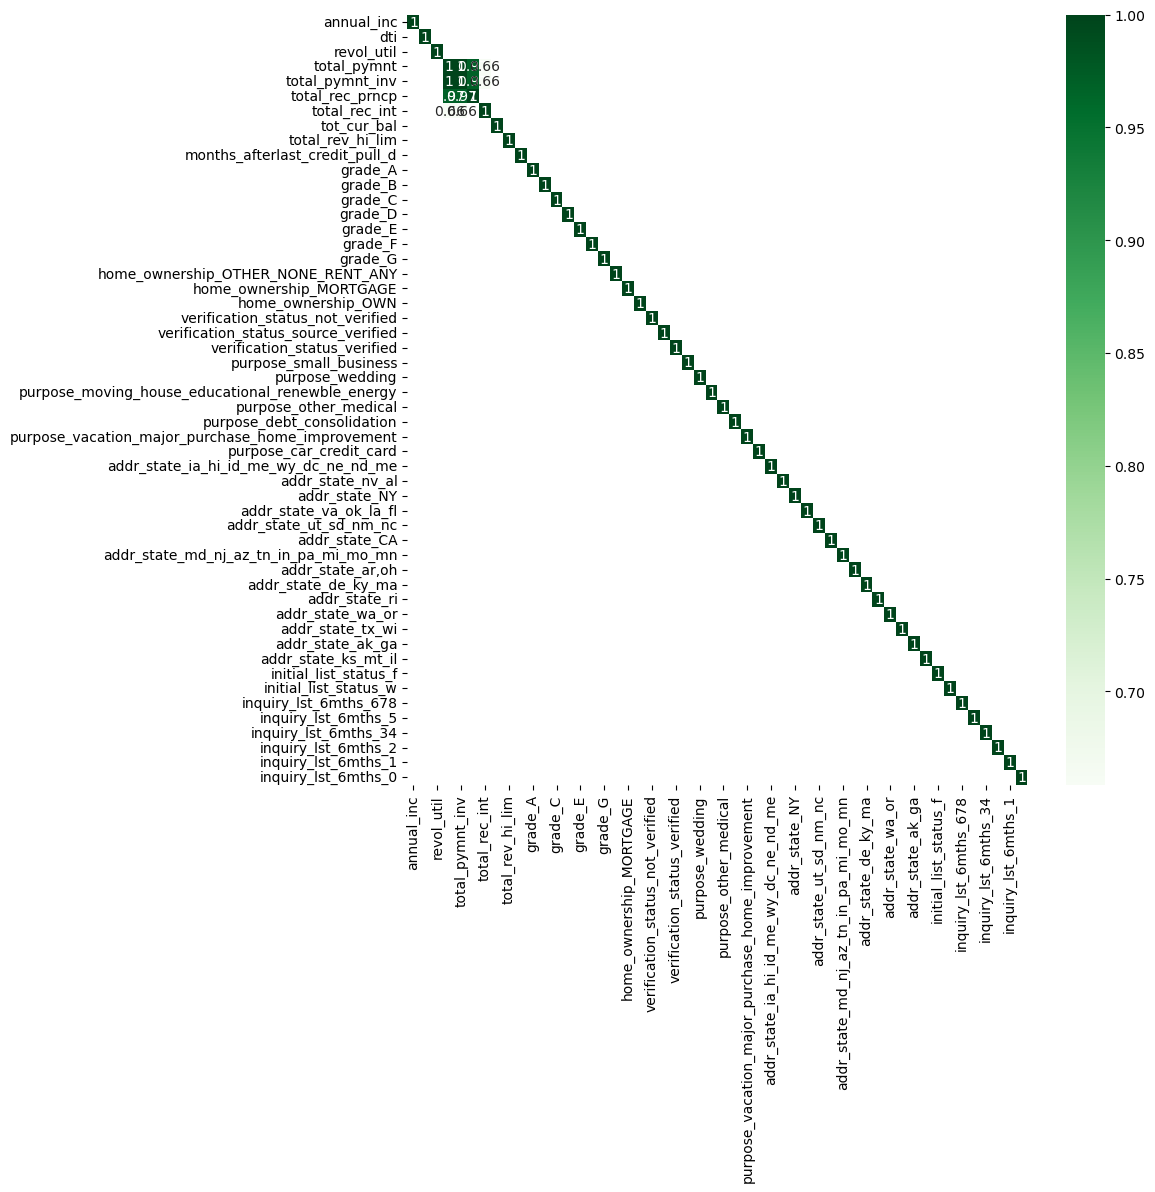

In [82]:
plt.figure(figsize= (10,10))
cor = loan5.corr()
cor = cor[cor>=0.5]
sns.heatmap(cor, annot = True, cmap = 'Greens')

<AxesSubplot:>

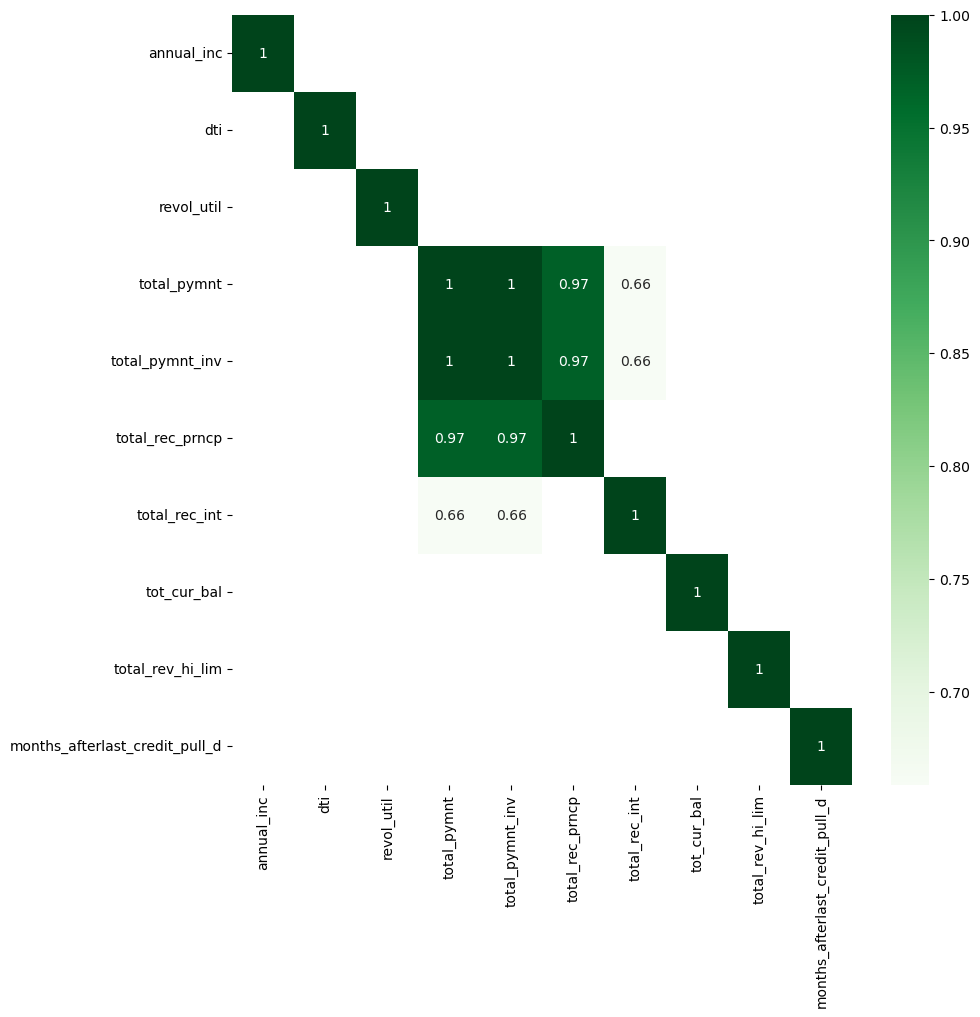

In [83]:
# zooming in
plt.figure(figsize= (10,10))
cor = loan5.iloc[:,:10].corr()
cor = cor[cor>=0.5]
sns.heatmap(cor, annot = True, cmap = 'Greens')

In [84]:
loan5[['total_pymnt', 'total_pymnt_inv']].diff(axis=1).reset_index()['total_pymnt_inv'].value_counts()

 0.000000     680442
-1.750000        101
-3.500000         98
-3.520000         97
-3.750000         96
               ...  
-0.001413          1
 0.001536          1
 0.001536          1
 0.001529          1
-19.890000         1
Name: total_pymnt_inv, Length: 73726, dtype: int64

The above 2 columns are highly correlated to each. It can be noticed that most of the data in both columns are same so dropping any one of them will make sense.

In [85]:
loan5.drop('total_pymnt_inv', axis = 1, inplace=True)

In [86]:
# resulting shape
loan5.shape

(802078, 51)

In [87]:
loan5.isnull().mean()

annual_inc                                          0.0
dti                                                 0.0
revol_util                                          0.0
total_pymnt                                         0.0
total_rec_prncp                                     0.0
total_rec_int                                       0.0
tot_cur_bal                                         0.0
total_rev_hi_lim                                    0.0
months_afterlast_credit_pull_d                      0.0
grade_A                                             0.0
grade_B                                             0.0
grade_C                                             0.0
grade_D                                             0.0
grade_E                                             0.0
grade_F                                             0.0
grade_G                                             0.0
home_ownership_OTHER_NONE_RENT_ANY                  0.0
home_ownership_MORTGAGE                         

In [88]:
loan5.describe()

,annual_inc,dti,revol_util,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,total_rev_hi_lim,months_afterlast_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER_NONE_RENT_ANY,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_not_verified,verification_status_source_verified,verification_status_verified,purpose_small_business,purpose_wedding,purpose_moving_house_educational_renewble_energy,purpose_other_medical,purpose_debt_consolidation,purpose_vacation_major_purchase_home_improvement,purpose_car_credit_card,addr_state_ia_hi_id_me_wy_dc_ne_nd_me,addr_state_nv_al,addr_state_NY,addr_state_va_ok_la_fl,addr_state_ut_sd_nm_nc,addr_state_CA,addr_state_md_nj_az_tn_in_pa_mi_mo_mn,"addr_state_ar,oh",addr_state_de_ky_ma,addr_state_ri,addr_state_wa_or,addr_state_tx_wi,addr_state_ak_ga,addr_state_ks_mt_il,initial_list_status_f,initial_list_status_w,inquiry_lst_6mths_678,inquiry_lst_6mths_5,inquiry_lst_6mths_34,inquiry_lst_6mths_2,inquiry_lst_6mths_1,inquiry_lst_6mths_0
count,8.020780e+05,802078.000000,802078.00000,802078.000000,802078.000000,802078.000000,8.020780e+05,8.020780e+05,802078.000000,802078.000000,802078.000000,802078.00000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000,802078.000000
mean,7.551238e+04,18.468647,55.32049,7186.721553,5440.041393,1705.534877,1.394288e+05,3.208470e+04,3.124038,0.161600,0.285401,0.28284,0.158694,0.079995,0.025622,0.005847,0.394806,0.505052,0.100142,0.291248,0.381798,0.326953,0.009051,0.001088,0.009722,0.053826,0.598765,0.079673,0.247874,0.012667,0.026799,0.082048,0.118440,0.042967,0.143563,0.212074,0.041263,0.035121,0.004356,0.034328,0.094111,0.035161,0.052117,0.476763,0.523237,0.001077,0.004062,0.051286,0.102999,0.272045,0.568532
std,6.461291e+04,17.881808,23.47153,7581.299818,6444.106774,2002.878428,1.536491e+05,3.757721e+04,3.926951,0.368084,0.451606,0.45038,0.365391,0.271285,0.158005,0.076244,0.488809,0.499975,0.300190,0.454338,0.485828,0.469100,0.094708,0.032973,0.098121,0.225675,0.490149,0.270787,0.431778,0.111833,0.161496,0.274438,0.323128,0.202783,0.350647,0.408777,0.198898,0.184086,0.065858,0.182071,0.291983,0.184187,0.222263,0.499460,0.499460,0.032803,0.063604,0.220580,0.303957,0.445013,0.495281
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.600000e+04,12.180000,38.10000,1835.947500,1149.050000,436.140000,2.982600e+04,1.400000e+04,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.500000e+04,17.950000,56.10000,4565.240000,2982.690000,1052.100000,8.058700e+04,2.370000e+04,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [89]:
loan5.to_csv('cleaned_creditrisk.csv', index=False)